# Project 2: Ames Iowa Housing Price Prediction

This project demostrates the following:

## Project Content Overview:
- [Problem Statement](#Problem-Statement)
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Preprocessing and Feature Engineering](#Preprocessing-and-Feature-engineering)
- [LinearRegression Model](#Linear-Regression-Model)
- [Ridge Model](#Ridge-Model)
- [Lasso Model](#Lasso)
- [Elastic Net Model](#Elastic-net-Model)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Problem Statement

The Ames Housing Dataset was introduced by Professor Dean De Cock in 2011. It contains 2930 observations of housing sales in Ames, Iowa between 2006 and 2010. There are 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables describing each house’s size, quality, area, age, and other miscellaneous attributes.

Real estate is a tangible asset made up of property and the land on which it sits. Housing price ranges are of great interest for both buyers and sellers. People looking to buy a new home tend to be more conservative with their budgets and market strategies. 

Therefore, it is important to investigate:
1. What are the features that will value-add a home and increase its sales price
2. The predicted sales price of a home if a combination of features is given
3. Likewise, predict feature combinations based on a given budget

In this project, I will use Ames housing data to create linear regression models that predicts the price of houses in Ames, Iowa.

The types of models that will be created are linear Regression, Lasso and Elastic Net. The best model will be selected for housing price prediction investigations mentioned.

The success of the model will be determined by the root mean squared error (RMSE) value. It is a measure of how accurately the model predicts the sales price. Lower values of RMSE indicate better fit.

This project will demostrates:
1. Data Cleaning
2. Exploratory Data Analysis
3. Preprocessing
4. Feature Engineering
5. Modeling and Regularization
6. Recommendations of value-added features based on research and modeling results

## Executive Summary

An executive summary is a brief introduction and summary of your business plan. It should describe your business, the problem that it solves, your target market, and numerical/financial highlights.
Much of what you labelled under problem statement in readme, is more appropriate for executive summary. Could then put more detailed specific problem(s) in the problem statement section. Ie. Select one state to focus on next, strategy for it, with intention to replicate it across other states if successful.

An elastic net regression model had the best predictive performance on housing sale price in Ames USA, and outperformed the other linear models tested. The model revealed that square feet area, condition, age, and the location of the house are the most important determinant factors of how much a house sells for.

For house buyers with specific budgets, this model would allow one to figure out what features they would be able to afford given an amount of money. For those looking to invest, houses in the Northridge Heights, Stone Brook, and Northridge neighbourhoods all had higher prices compared to other neighbourhoods. Conversely, people looking to sell their house would be able to use the model to get an estimate of how much they would be able to sell their house for. If one is looking to sell, they should do it sooner rather than later, as the age of the house is the biggest contributing factor to the decrease in value. Having a garage in bad condition also negatively affect value, as does having a second floor to the house. And unsurprisingly, if the house is severely damaged, its value drops. As such, those looking to increase the value of their home could consider increasing the square footage of their house, renovating the kitchen and garage, and adding a fireplace.

The model may however have limited applicabilities, as it was developed using data on houses sold between 2006 - 2010 in Ames, USA. This dataset is limited in scope both in terms of the time frame captured, as well as location. The small time frame of four years is not enough to capture any annual changes in sale price that could arise as a result of external factors, such as the current economy. Housing prices at present (in 2019) may also have changed as a result of inflation. The model is also specific to houses in Ames and may not be as accurate when applied to data from another city or country, where house prices may be affected by different things than for example, garageq quality.

In reality, house price may be difficult to predict as it is also affected by buyers' psychology, the economic climate, and other factors not included in the present dataset. There will never be a perfect model; the aim of this model is therefore not to give a perfect prediction, but act as a guideline to inform decisions.

In [1]:
# Import libraries

# For maths
import scipy.stats as stats
import numpy as np
import pandas as pd

# For visuals
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# For modeling/linear regression
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV,ElasticNet, ElasticNetCV 
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error

# display link
from IPython.core.display import display, HTML

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.options.display.max_rows = 4000
pd.options.display.max_columns = 500

## Data Import & Cleaning

In [2]:
# read the train file provided
train = pd.read_csv('../data/train.csv')

# Convert header to lowercase
train.columns = train.columns.str.lower()

# replace space in column names with _
train.columns = train.columns.str.replace(' ', '_')

# check the number of columns and rows (inlusive of header and index)
print("There are", train.shape[0], "rows and", train.shape[1], "columns")

# check for duplicates
print("There are", train.duplicated().sum(), "duplicates")
# There are no duplicates

# display train file
train.head()

There are 2051 rows and 81 columns
There are 0 duplicates


id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [3]:
# display list of columns header
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

**Data types**

In [4]:
# Display and check data types are correct 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

**Null values**

In [5]:
# Compute number of columns with missing values
null_col = train.isnull().sum().sort_values(ascending = False)
print("Number of columns with missing values: ", null_col[null_col > 0].count())

# Display column names with its number of missing values
print("Display column names with its number of missing values as below:")
print(null_col[null_col > 0])
# compare against data describe

Number of columns with missing values:  26
Display column names with its number of missing values as below:
pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_cond        114
garage_qual        114
garage_yr_blt      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
garage_area          1
bsmt_unf_sf          1
bsmtfin_sf_2         1
total_bsmt_sf        1
bsmtfin_sf_1         1
dtype: int64


Based on the [data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt), missing data can be due to facility not available for the particular home. Below are the columns with NA options.
1. pool_qc
2. misc_feature
3. alley
4. fence
5. fireplace_qu
6. bsmt_exposure(NA can also be due to without exposure)
7. bsmtfin_type_1
8. mas_vnr_type
9. mas_vnr_area
10. bsmt_cond
11. bsmt_qual
12. garage_finish
13. garage_cond
14. garage_qual
15. garage_yr_blt

Missing data that requires attention and further investigation:
16. bsmtfin_type_2. There is 1 row with type 1 data but missing type 2. Will drop it
17. garage_type. Based on the garage related missing null values, there should be 114 missing values for garage_type. However, there is only 113. Will proceed to drop as the row that had an extra value in garage_type.

Below are columns that can contain missing values as it should return 0 when there is no facility. We can fill the missing values with 0 if data is continueous and NA if ordinal:
18. lot_frontage
19. bsmt_half_bath
20. bsmt_full_bath

Below are columns that with 1 or 2 missing value count that we can proceed to drop since it doesnt affect the data:
21. garage_cars
22. garage_area
23. bsmt_unf_sf
24. bsmtfin_sf_2
25. bsmtfin_sf_1
26. total_bsmt_sf

In [6]:
# all 2042 missing values in pool_qc is due to the respective home without pool area
train[(train.pool_area ==0) & (train.pool_qc.isnull())][['pool_area', 'pool_qc']]

pool_area pool_qc
0             0     NaN
1             0     NaN
2             0     NaN
3             0     NaN
4             0     NaN
...         ...     ...
2046          0     NaN
2047          0     NaN
2048          0     NaN
2049          0     NaN
2050          0     NaN

[2042 rows x 2 columns]

In [7]:
# all 1000 missing values in fireplace_qu is due to the respective home without fireplaces
train[(train.fireplaces ==0) & (train.fireplace_qu.isnull())][['fireplaces', 'fireplace_qu']]

fireplaces fireplace_qu
0              0          NaN
2              0          NaN
3              0          NaN
4              0          NaN
6              0          NaN
...          ...          ...
2034           0          NaN
2038           0          NaN
2039           0          NaN
2044           0          NaN
2047           0          NaN

[1000 rows x 2 columns]

In [8]:
# all 22 missing values in mas_vnr_type tallies with mas_vnr_area
print(train[(train.mas_vnr_type.isnull()) & (train.mas_vnr_area.isnull())][['mas_vnr_type', 'mas_vnr_area']].shape)
train[(train.mas_vnr_type.isnull()) & (train.mas_vnr_area.isnull())][['mas_vnr_type', 'mas_vnr_area']]

(22, 2)


mas_vnr_type  mas_vnr_area
22            NaN           NaN
41            NaN           NaN
86            NaN           NaN
212           NaN           NaN
276           NaN           NaN
338           NaN           NaN
431           NaN           NaN
451           NaN           NaN
591           NaN           NaN
844           NaN           NaN
913           NaN           NaN
939           NaN           NaN
1025          NaN           NaN
1244          NaN           NaN
1306          NaN           NaN
1430          NaN           NaN
1434          NaN           NaN
1606          NaN           NaN
1699          NaN           NaN
1815          NaN           NaN
1820          NaN           NaN
1941          NaN           NaN

In [9]:
# Investigate the available 1 value in garage_type, which its other garage data is missing
train[(train.garage_type.notnull()) & (train.garage_cond.isnull())][['garage_type', 'garage_cond']]
# To drop this row later on since it didnt give me information on its garage row 1712

garage_type garage_cond
1712      Detchd         NaN

In [10]:
# Basement null values investigation
train[(train.bsmt_half_bath.isnull())][['total_bsmt_sf','bsmtfin_type_1','bsmtfin_type_2', 'bsmt_cond', 'bsmt_half_bath', 'bsmt_exposure', 'bsmt_unf_sf']]
# These 2 homes doesnt seem to have a basement

total_bsmt_sf bsmtfin_type_1 bsmtfin_type_2 bsmt_cond  bsmt_half_bath  \
616             0.0            NaN            NaN       NaN             NaN   
1327            NaN            NaN            NaN       NaN             NaN   

     bsmt_exposure  bsmt_unf_sf  
616            NaN          0.0  
1327           NaN          NaN

In [11]:
# row 1147 has a Type 2 surface finish value of 470 but it doesnt have the bsmtfin_type_2 value.
train[(train.bsmtfin_type_2.isnull())& (train.bsmtfin_type_1.notnull())][['total_bsmt_sf','bsmtfin_type_1','bsmtfin_type_2', 'bsmt_cond', 'bsmt_half_bath', 'bsmt_exposure', 'bsmt_unf_sf', 'bsmtfin_sf_2']]
# Will drop this row 1147 later on

total_bsmt_sf bsmtfin_type_1 bsmtfin_type_2 bsmt_cond  bsmt_half_bath  \
1147         3206.0            GLQ            NaN        TA             0.0   

     bsmt_exposure  bsmt_unf_sf  bsmtfin_sf_2  
1147            No       1603.0         479.0

In [12]:
# Identify rows with most missing values
null_rows = train.isnull().sum(axis=1)
null_rows.sort_values(ascending = False).head(10)

114     16
580     15
437     15
1327    15
2010    15
1594    15
1428    15
1098    14
700     14
256     14
dtype: int64

**Summary Statistics**

There were 2051 houses data captured, for individual residential properties sold in Ames, IA from 2006 to 2010.
The statistics were described for the important features as below:
- Median of lot frontage is 69 sq ft, mean is 68 feet. The max can reach 313 feet. Std dev is 23 sq ft.
- Average total basement size is 1058 sq ft. The biggest size is almost 6 times the average. This could be an outlier mentioned in the data description. The median is 994 sq feet, meaning it is common to have basements and around the size of 994 sq ft.
- Ground living area (gr_liv_area) average is 1499 sq feet. Largest size is 5642 sq feet. Most of the homes are at 1444 sq ft median (median). Smallest is 334 sq ft. Std dev is 500 sq ft.
- The garage area average is 474 sq ft, median at 480 sq ft. Largest is 1418 sq feet. Some homes doesnt have a garage.
- Average number of rooms in the house is 6, which is same as median. Highest number of room is 15. Lowest number of room is 2
- Average price for the homes is 181K, median is 162K, std dev is 79K. Highest price can reach 611K, lowest 12K
- Out of a scale of 10, most homes were sold are of scale quality 6.

Generally, most of the homes sold in Ames are 6 rooms, with lot frontage 69 ft, with basement size 1058 sq ft, ground living area around 1444 sq ft, with garage area  480 sq ft, prcing range around $162K - $181K, quality of homes slightly above average at 6. The larger size of the homes are outliers which will be removed later on.

In [13]:
train.describe().T

count          mean           std          min          25%  \
id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
pid              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
ms_subclass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
lot_frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
lot_area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
overall_qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
overall_cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
year_built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
year_remod/add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
mas_vnr_area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
bsmtfin_sf_1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
bsmtfin_sf_2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
bsmt_unf_sf      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
total_bsmt_sf    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st_flr_sf       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd_flr_sf       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
low_qual_fin_sf  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
gr_liv_area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
bsmt_full_bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
bsmt_half_bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
full_bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
half_bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
bedroom_abvgr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
kitchen_abvgr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
totrms_abvgrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
garage_yr_blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
garage_cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
garage_area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
wood_deck_sf     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
open_porch_sf    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
enclosed_porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3ssn_porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
screen_porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
pool_area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
misc_val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
mo_sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
yr_sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
saleprice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
id                    1486.0  2.198000e+03       2930.0  
pid              535453200.0  9.071801e+08  924152030.0  
ms_subclass             50.0  7.000000e+01        190.0  
lot_frontage            68.0  8.000000e+01        313.0  
lot_area              9430.0  1.151350e+04     159000.0  
overall_qual             6.0  7.000000e+00         10.0  
overall_cond             5.0  6.000000e+00          9.0  
year_built            1974.0  2.001000e+03       2010.0  
year_remod/add        1993.0  2.004000e+03       2010.0  
mas_vnr_area             0.0  1.610000e+02       1600.0  
bsmtfin_sf_1           368.0  7.337500e+02       5644.0  
bsmtfin_sf_2             0.0  0.000000e+00       1474.0  
bsmt_unf_sf            

**Examine scatter plots**

In [14]:
# list with only numerical columns
col_numerical = [col for col in train.columns if train[col].dtype != np.object]

# list with only categorical columns
col_categorical = [col for col in train.columns if col not in col_numerical]

In [15]:
def subplot_scatterp(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(20, nrows*5.5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.regplot(y=dataframe.saleprice, x=dataframe[column],ax=ax[i])
        ax[i].set_title(column,fontsize=14)
        # Set titles, labels, etc here for each subplot

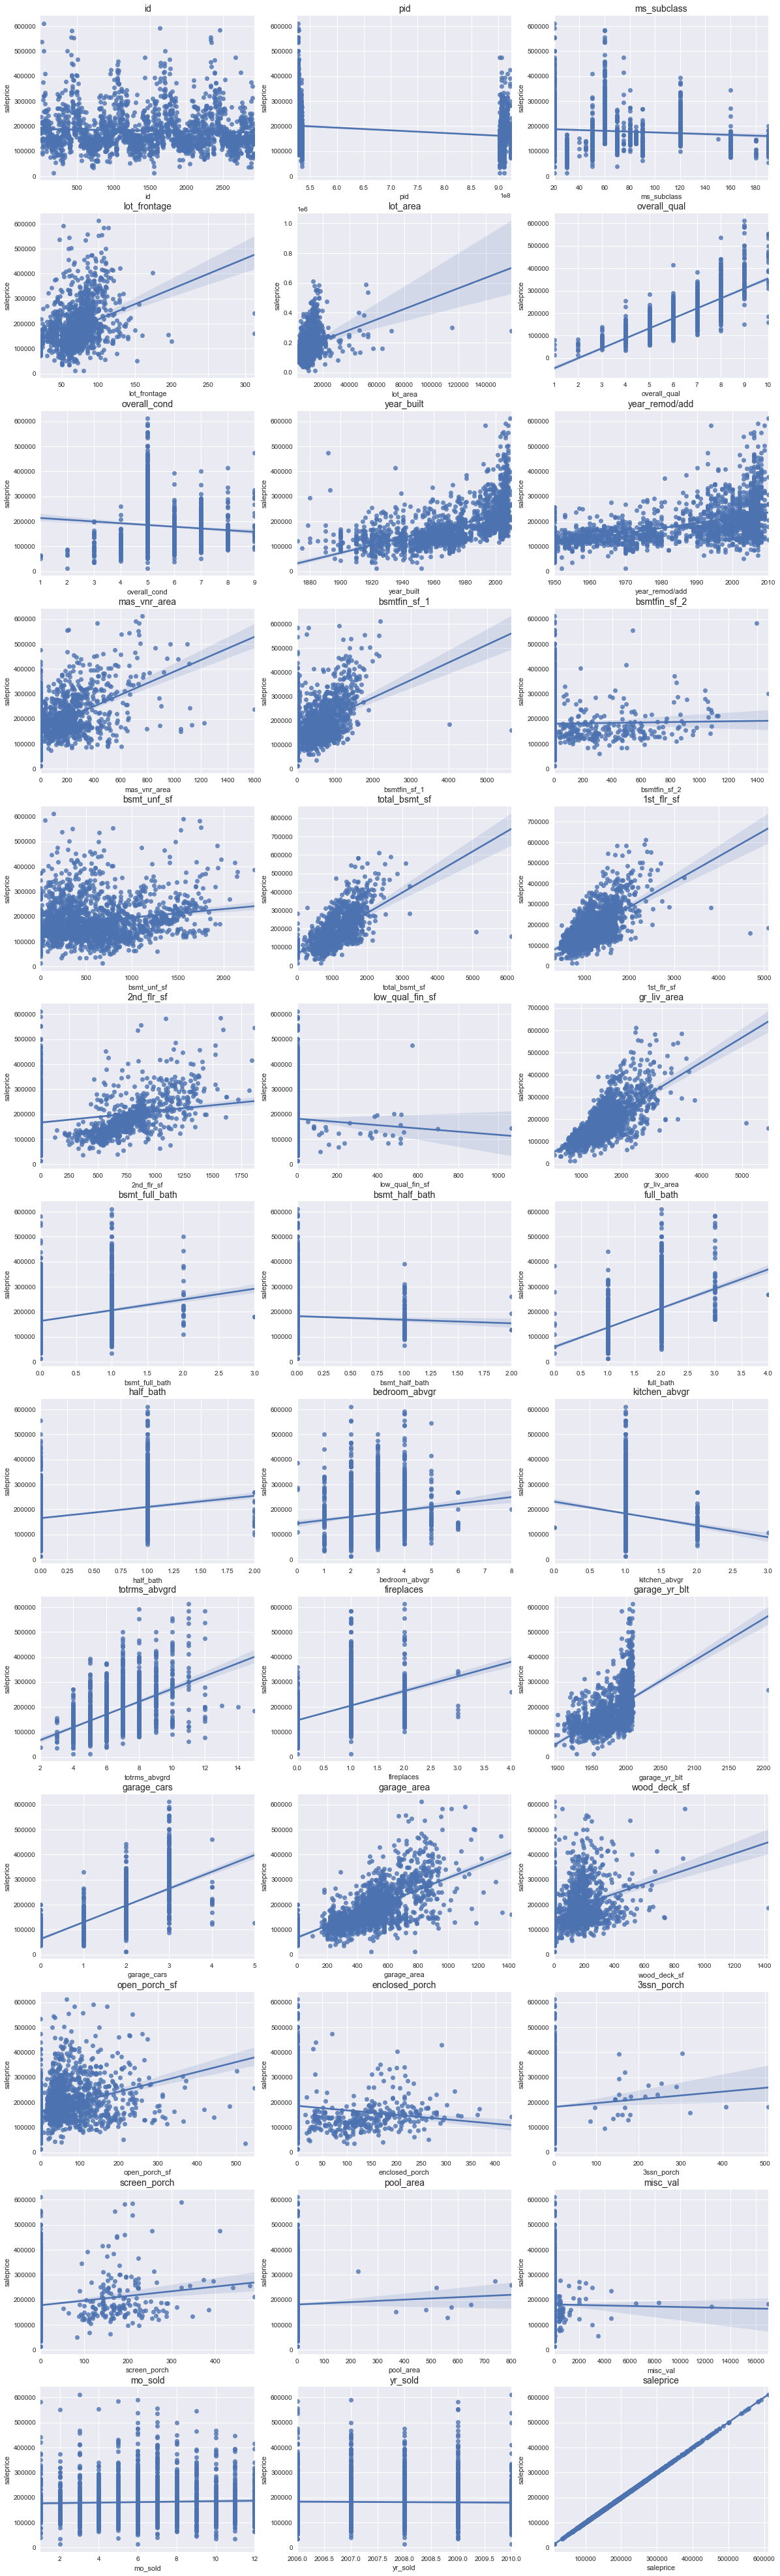

In [16]:
subplot_scatterp(train, col_numerical)

In [17]:
# Plot boxplot for categorical columns
def subplot_boxp(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(20, nrows*5.5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.boxplot(x = dataframe[column], y = dataframe.saleprice, width = 0.3, ax = ax[i])
        ax[i].set_title(column)
        # Set titles, labels, etc here for each subplot

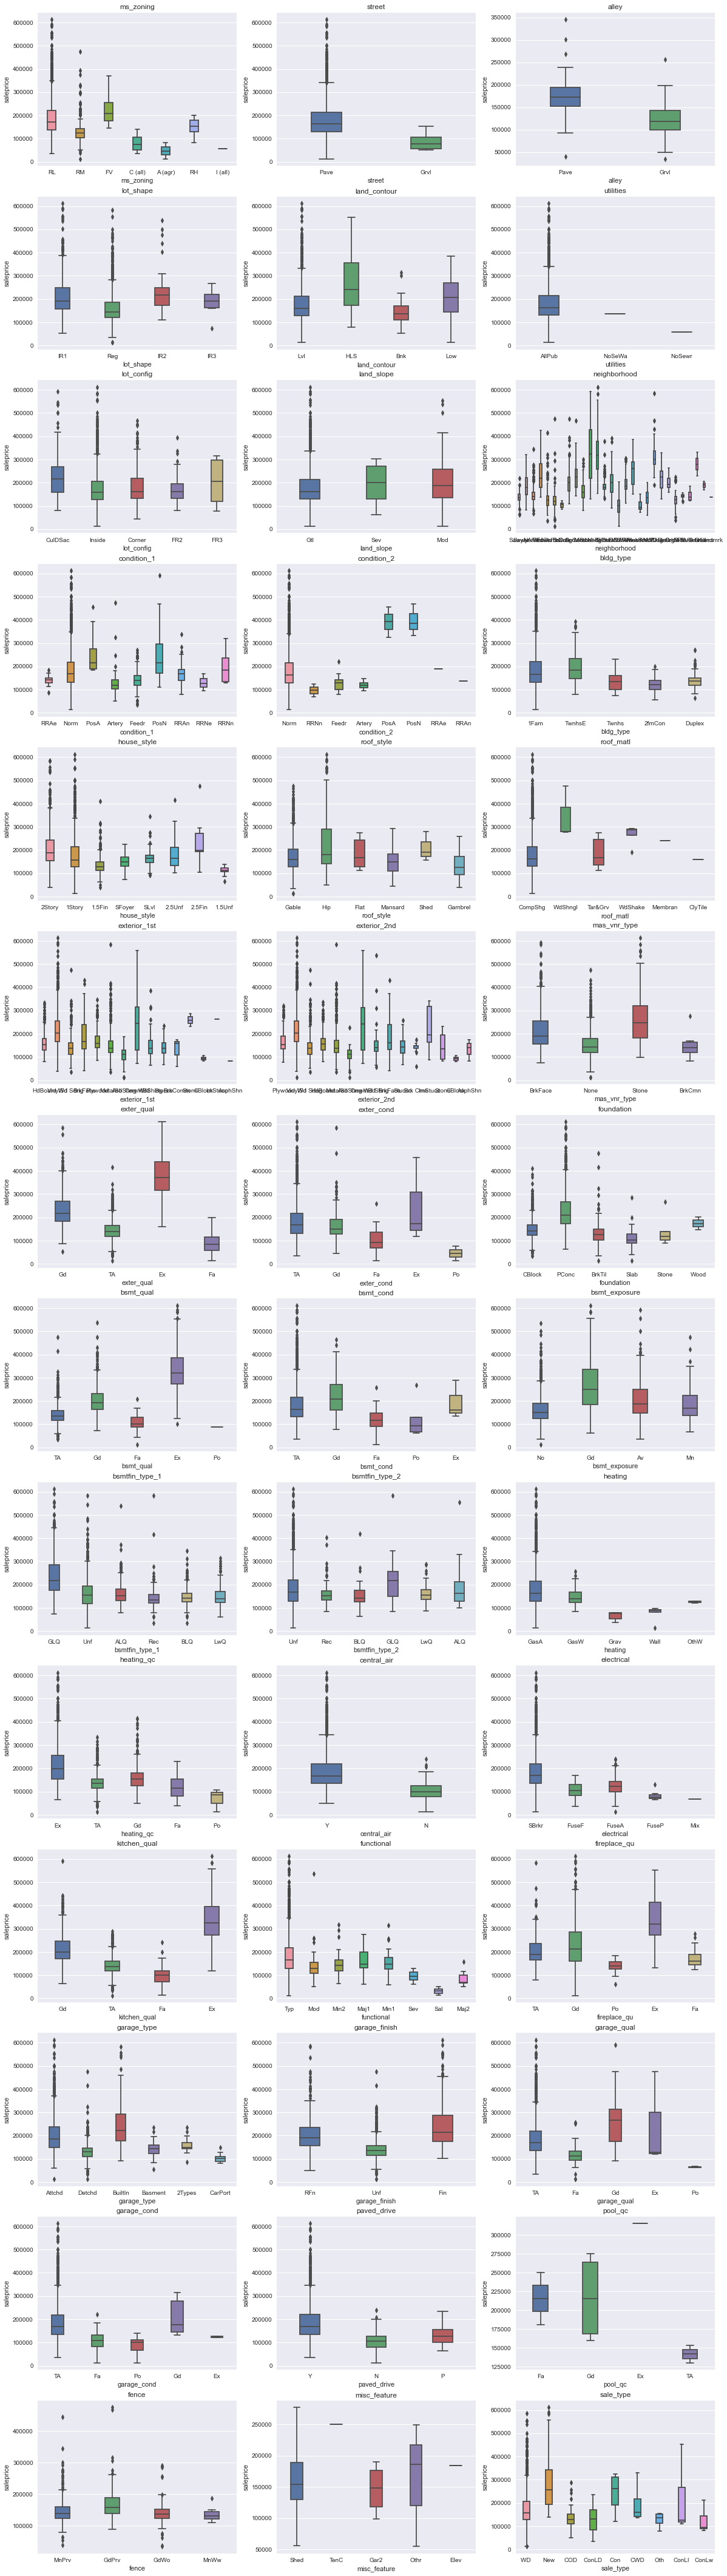

In [18]:
subplot_boxp(train, col_categorical);

**Remove outliers using the plots above & based on null values analysis**

Outliers observed from the scatter plots, to be removed:
- lot_frontage (outliers above 300 sq ft)
- lot_area (outliers above 100000 sq ft)
- mas_vnr_area (outliers above 1400)
- bsmtfin_sf_2 (outlier above 1400)
- garage_yr_blt (outlier > 2010)
- bsmtfin_sf_1 (outlier > 3500)
- 1st_flr_sf (outlier above 3500)
- gr_liv_area (outliers above 5000)

Columns to be dropped due to less correlation observed, multicollinearity with other features, high missing data:
- garage_yr_blt (collinearity with home year built)
- misc_val (no correlation and mostly 0s)
- utilities (mostly single values and all homes need utilities so it is redundant)
- lot frontage (lack of correlation and lots of missing data)
- alley (lots of missing data and single values)

Display all rows to be removed as below:

In [19]:
train[(train.lot_frontage > 300)]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1335  1266  535427070           20        RL         313.0     27650   Pave   

     alley lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
960    NaN       IR3          Bnk  ...            0       480      Gd   NaN   
1335   NaN       IR2          HLS  ...            0         0     NaN   NaN   

     misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
960           NaN        0       1    2008        New     160000  
1335          NaN        0      11    2008        WD      242000  

[2 rows x 81 columns]

In [20]:
train[(train.lot_area > 100000)]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
471  2116  906426060           50        RL           NaN    159000   Pave   
694  2072  905301050           20        RL           NaN    115149   Pave   

    alley lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
471   NaN       IR2          Low  ...            0         0     NaN   NaN   
694   NaN       IR2          Low  ...            0         0     NaN   NaN   

    misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
471         Shed      500       6    2007        WD      277000  
694          NaN        0       6    2007        WD      302000  

[2 rows x 81 columns]

In [21]:
train[(train.mas_vnr_area > 1400)]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1409  1850  533241030           60        FV          66.0      7399   Pave   

     alley lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
1409  Pave       IR1          Lvl  ...          198         0     NaN   NaN   

     misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
1409          NaN        0       6    2007        WD      239000  

[1 rows x 81 columns]

In [22]:
train[(train.bsmtfin_sf_2 > 1400)]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
770  2093  906201200           60        RL          86.0     10380   Pave   

    alley lot_shape land_contour  ... screen_porch pool_area pool_qc  fence  \
770   NaN       IR1          Lvl  ...            0         0     NaN  MnPrv   

    misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
770          NaN        0       8    2007        WD      301000  

[1 rows x 81 columns]

In [23]:
train[(train.garage_yr_blt > 2010)]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1699  2261  916384070           20        RL          68.0      8298   Pave   

     alley lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
1699   NaN       IR1          HLS  ...            0         0     NaN   NaN   

     misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
1699          NaN        0       9    2007        New     267300  

[1 rows x 81 columns]

In [24]:
train[(train.bsmtfin_sf_1 > 3500)]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1885  2181  908154195           20        RL         128.0     39290   Pave   

     alley lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
960    NaN       IR3          Bnk  ...            0       480      Gd   NaN   
1885   NaN       IR1          Bnk  ...            0         0     NaN   NaN   

     misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
960           NaN        0       1    2008        New     160000  
1885         Elev    17000      10    2007        New     183850  

[2 rows x 81 columns]

In [25]:
train[(train['1st_flr_sf'] > 3500)]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
616   1498  908154080           20        RL         123.0     47007   Pave   
960   1499  908154235           60        RL         313.0     63887   Pave   
1885  2181  908154195           20        RL         128.0     39290   Pave   

     alley lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
616    NaN       IR1          Lvl  ...            0         0     NaN   NaN   
960    NaN       IR3          Bnk  ...            0       480      Gd   NaN   
1885   NaN       IR1          Bnk  ...            0         0     NaN   NaN   

     misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
616           NaN        0       7    2008        WD      284700  
960           NaN        0       1    2008        New     160000  
1885         Elev    17000      10    2007        New     183850  

[3 rows x 81 columns]

Based on [data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt), remove houses with size > 4000 sq ft:

In [26]:
train[(train['gr_liv_area'] > 4000)]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1885  2181  908154195           20        RL         128.0     39290   Pave   

     alley lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
960    NaN       IR3          Bnk  ...            0       480      Gd   NaN   
1885   NaN       IR1          Bnk  ...            0         0     NaN   NaN   

     misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
960           NaN        0       1    2008        New     160000  
1885         Elev    17000      10    2007        New     183850  

[2 rows x 81 columns]

In [27]:
# remove row 1712 as there is a garage type but no garage information of any sorts
train[(train.garage_type.notnull()) & (train.garage_cond.isnull())][['garage_type', 'garage_cond']]

garage_type garage_cond
1712      Detchd         NaN

In [28]:
# row 1147 has a Type 2 surface finish value of 479 but it doesnt have the bsmtfin_type_2 value.
train[(train.bsmtfin_type_2.isnull())& (train.bsmtfin_type_1.notnull())][['total_bsmt_sf','bsmtfin_type_1','bsmtfin_type_2', 'bsmt_cond', 'bsmt_half_bath', 'bsmt_exposure', 'bsmt_unf_sf', 'bsmtfin_sf_2']]
# Will drop this row 1147 as it is a typo

total_bsmt_sf bsmtfin_type_1 bsmtfin_type_2 bsmt_cond  bsmt_half_bath  \
1147         3206.0            GLQ            NaN        TA             0.0   

     bsmt_exposure  bsmt_unf_sf  bsmtfin_sf_2  
1147            No       1603.0         479.0

**Drop all rows as decided above**

In [29]:
# drop all rows as decided
train.drop([960, 1355, 471, 694, 1409, 770, 1699, 960, 1885, 1712, 1147], axis = 0, inplace=True)

In [30]:
# Drop the small percentage of missing values identified during Null analysis
train.dropna(subset=['bsmt_full_bath', 'bsmt_half_bath','bsmtfin_sf_1', 'total_bsmt_sf', 'bsmtfin_sf_2',\
                     'bsmt_unf_sf'],inplace=True)

In [31]:
# Compute number of columns with missing values
print("Number of rows is", train.shape[0], "and number of columns is", str(train.shape[1]) + ".")
null_col = train.isnull().sum().sort_values(ascending = False)
print("Number of columns with missing values: ", null_col[null_col > 0].count())

# Display column names with its number of missing values
print("Display column names with its number of missing values as below:")
print(null_col[null_col > 0])
# compare against data describe

Number of rows is 2039 and number of columns is 81.
Number of columns with missing values:  18
Display column names with its number of missing values as below:
pool_qc           2031
misc_feature      1976
alley             1900
fence             1642
fireplace_qu       997
lot_frontage       328
garage_cond        113
garage_type        113
garage_yr_blt      113
garage_finish      113
garage_qual        113
bsmt_exposure       56
bsmt_cond           53
bsmt_qual           53
bsmtfin_type_1      53
bsmtfin_type_2      53
mas_vnr_area        21
mas_vnr_type        21
dtype: int64


In [32]:
# drop garage_yr_blt, misc_val, utilities, alley for train
train = train.drop(['garage_yr_blt', 'misc_val', 'utilities', 'lot_frontage', 'alley'], axis=1)

**Replace Na and 0 for missing data**

In [33]:
# fill categorical columns with Na
cols = ['pool_qc','misc_feature','fence','fireplace_qu','garage_cond','garage_type', 'garage_finish', \
        'garage_qual', 'bsmt_exposure', 'bsmt_cond', 'bsmt_qual', 'bsmtfin_type_1', 'bsmtfin_type_2', 'mas_vnr_type']

for col in cols:
    train[col] = train[col].fillna(value='NA')

In [34]:
# fill numerical columns with 0
cols_num = ['mas_vnr_area']

for col in cols_num:
    train[col] = train[col].fillna(value=0)

In [35]:
# Compute number of columns with missing values again
print("Number of rows is", train.shape[0], "and number of columns is", str(train.shape[1]) + ".")
null_col = train.isnull().sum().sort_values(ascending = False)
print("Number of columns with missing values: ", null_col[null_col > 0].count())

# Display column names with its number of missing values
print("Display column names with its number of missing values as below:")
print(null_col[null_col > 0])
# All data fill is complete

Number of rows is 2039 and number of columns is 76.
Number of columns with missing values:  0
Display column names with its number of missing values as below:
Series([], dtype: int64)


**Replace Na and 0 for missing data test.csv and drop columns**

In [36]:
# read the train file provided
test = pd.read_csv('../data/test.csv')

# Convert header to lowercase
test.columns = test.columns.str.lower()

# replace space in column names with _
test.columns = test.columns.str.replace(' ', '_')

# check the number of columns and rows (inlusive of header and index)
print("There are", test.shape[0], "rows and", test.shape[1], "columns")

There are 879 rows and 80 columns


In [37]:
# drop garage_yr_blt, misc_val, utilities for test set
test = test.drop(['garage_yr_blt', 'misc_val', 'utilities', 'lot_frontage', 'alley'], axis=1)

In [38]:
# Compute number of columns with missing values for test.csv
null_test = test.isnull().sum().sort_values(ascending = False)
print("Number of columns with missing values: ", null_test[null_test > 0].count())

# Display column names with its number of missing values
print("Display column names with its number of missing values as below:")
print(null_test[null_test > 0])
# All data fill is complete

Number of columns with missing values:  16
Display column names with its number of missing values as below:
pool_qc           875
misc_feature      838
fence             707
fireplace_qu      422
garage_qual        45
garage_finish      45
garage_cond        45
garage_type        44
bsmtfin_type_2     25
bsmt_exposure      25
bsmt_cond          25
bsmt_qual          25
bsmtfin_type_1     25
mas_vnr_type        1
mas_vnr_area        1
electrical          1
dtype: int64


In [39]:
# fill categorical columns with Na
cols = ['pool_qc','misc_feature','fence','fireplace_qu','garage_cond','garage_type', 'garage_finish', \
        'garage_qual', 'bsmt_exposure', 'bsmt_cond', 'bsmt_qual', 'bsmtfin_type_1', 'bsmtfin_type_2', 'mas_vnr_type']

for col in cols:
    test[col] = test[col].fillna(value='NA')

In [40]:
# fill numerical columns with 0
cols_num = ['mas_vnr_area']

for col in cols_num:
    test[col] = test[col].fillna(value=0)

In [41]:
# Compute number of columns with missing values for test.csv
null_test = test.isnull().sum().sort_values(ascending = False)
print("Number of columns with missing values: ", null_test[null_test > 0].count())

# Display column names with its number of missing values
print("Display column names with its number of missing values as below:")
print(null_test[null_test > 0])
# All data fill is complete
# ignore the 1 missing value for electrical column for now

Number of columns with missing values:  1
Display column names with its number of missing values as below:
electrical    1
dtype: int64


In [42]:
# Since is only 1 value. I will impute it with the mode for electrical
test.electrical.value_counts()
# Snrkr

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

In [43]:
# row the missing data in electrical is 635. This needs to be impute
test[test.electrical.isnull()][['electrical']]

electrical
635        NaN

In [44]:
# fill electrical columns with Na
test['electrical'] = test['electrical'].fillna(value='Snrkr')

**Data dictionary (METADATA)**

| Feature         | Type   | Description                                                            | Values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
|-----------------|--------|------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:-:|:-:|:-:|
| saleprice       | int    | The property's sale price in dollars (Target Value)                    | USD                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| id              | int    | ID value for sale row                                                  | integer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| pid             | int    | ID value for property                                                  | integer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| ms_subclass     | int    | The building class                                                     | 20 - 1-STORY 1946 & NEWER ALL STYLES<br>30 - 1-STORY 1945 & OLDER<br>40 - 1-STORY W/FINISHED ATTIC ALL AGES<br>45 - 1-1/2 STORY - UNFINISHED ALL AGES<br>50 - 1-1/2 STORY FINISHED ALL AGES<br>60 - 2-STORY 1946 & NEWER<br>70 - 2-STORY 1945 & OLDER<br>75 - 2-1/2 STORY ALL AGES<br>80 - SPLIT OR MULTI-LEVEL<br>85 - SPLIT FOYER<br>90 - DUPLEX - ALL STYLES AND AGES<br>120 - 1-STORY PUD (Planned Unit Development) - 1946 & NEWER<br>150 - 1-1/2 STORY PUD - ALL AGES<br>160 - 2-STORY PUD - 1946 & NEWER<br>180 - PUD - MULTILEVEL - INCL SPLIT LEV/FOYER<br>190 - 2 FAMILY CONVERSION - ALL STYLES AND AGES                                           |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| ms_zoning       | object | Identifies the general zoning classification of the sale               | A - Agriculture<br>C - Commercial<br>FV - Floating Village Residential<br>I - Industrial<br>RH - Residential High Density<br>RL - Residential Low Density<br>RP - Residential Low Density Park<br>RM - Residential Medium Density                                                                                                                                                                                                                                                                                                                                                                                                                             |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| bldg_type       | object | Type of dwelling                                                       | 1Fam - Single-family Detached<br>2FmCon - Two-family Conversion; originally built as one-family dwelling<br>Duplx - Duplex<br>TwnhsE - Townhouse End Unit<br>TwnhsI - Townhouse Inside Unit                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| house_style     | object | Style of dwelling                                                      | 1Story - One story<br>1.5Fin - One and one-half story: 2nd level finished<br>1.5Unf - One and one-half story: 2nd level unfinished<br>2Story - Two story<br>2.5Fin - Two and one-half story: 2nd level finished<br>2.5Unf - Two and one-half story: 2nd level unfinished<br>SFoyer - Split Foyer<br>SLvl - Split Level                                                                                                                                                                                                                                                                                                                                        |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| lot_frontage    | float  | Linear feet of street connected to property                            | ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| lot_area        | int    | Lot size in square feet                                                | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| street          | int    | Type of road access to property                                        | Grvl - Gravel<br>Pave - Paved                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| alley           | object | Type of alley access to property                                       | Grvl - Gravel<br>Pave - Paved<br>NA - No alley access                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| lot_shape       | int    | General shape of property                                              | Reg - Regular<br>IR1 - Slightly irregular<br>IR2 - Moderately Irregular<br>IR3 - Irregular                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| land_contour    | int    | Flatness of the property                                               | Lvl - Near Flat/Level<br>Bnk - Banked - Quick and significant rise from street grade to building<br>HLS - Hillside - Significant slope from side to side<br>Low - Depression                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| utilities       | int    | Type of utilities available                                            | AllPub - All public Utilities (E,G,W,& S)<br>NoSewr - Electricity, Gas, and Water (Septic Tank)<br>NoSeWa - Electricity and Gas Only<br>ELO - Electricity only                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| lot_config      | object | Lot configuration                                                      | Inside - Inside lot<br>Corner - Corner lot<br>CulDSac - Cul-de-sac<br>FR2 - Frontage on 2 sides of property<br>FR3 - Frontage on 3 sides of property                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| land_slope      | int    | Slope of property                                                      | Gtl - Gentle slope<br>Mod - Moderate Slope<br>Sev - Severe Slope                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| neighborhood    | object | Physical locations within Ames city limits                             | Blmngtn - Bloomington Heights<br>Blueste - Bluestem<br>BrDale - Briardale<br>BrkSide - Brookside<br>ClearCr - Clear Creek<br>CollgCr - College Creek<br>Crawfor - Crawford<br>Edwards - Edwards<br>Gilbert - Gilbert<br>IDOTRR - Iowa DOT and Rail Road<br>MeadowV - Meadow Village<br>Mitchel - Mitchell<br>Names - North Ames<br>NoRidge - Northridge<br>NPkVill - Northpark Villa<br>NridgHt - Northridge Heights<br>NWAmes - Northwest Ames<br>OldTown - Old Town<br>SWISU - South & West of Iowa State University<br>Sawyer - Sawyer<br>SawyerW - Sawyer West<br>Somerst - Somerset<br>StoneBr - Stone Brook<br>Timber - Timberland<br>Veenker - Veenker |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| condition_1     | object | Proximity to main road or railroad                                     | Artery - Adjacent to arterial street<br>Feedr - Adjacent to feeder street<br>Norm - Normal<br>RRNn - Within 200' of North-South Railroad<br>RRAn - Adjacent to North-South Railroad<br>PosN - Near positive off-site feature--park, greenbelt, etc.<br>PosA - Adjacent to postive off-site feature<br>RRNe - Within 200' of East-West Railroad<br>RRAe - Adjacent to East-West Railroad                                                                                                                                                                                                                                                                       |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| condition_2     | object | Proximity to main road or railroad (if a second is present)            | Proximity to main road or railroad                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            | Artery - Adjacent to arterial street<br>Feedr - Adjacent to feeder street<br>Norm - Normal<br>RRNn - Within 200' of North-South Railroad<br>RRAn - Adjacent to North-South Railroad<br>PosN - Near positive off-site feature--park, greenbelt, etc.<br>PosA - Adjacent to postive off-site feature<br>RRNe - Within 200' of East-West Railroad<br>RRAe - Adjacent to East-West Railroad |   |   |   |
| overall_qual    | int    | Overall material and finish quality                                    | 1 - Very Poor <-> 10 - Very Excellent                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| overall_cond    | int    | Overall condition rating                                               | 1 - Very Poor <-> 10 - Very Excellent                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| year_built      | int    | Original construction date                                             | year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| year_remod/add  | int    | Remodel date (same as construction date if no remodeling or additions) | year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| roof_style      | object | Type of roof                                                           | Flat - Flat<br>Gable - Gable<br>Gambrel - Gabrel (Barn)<br>Hip - Hip<br>Mansard - Mansard<br>Shed - Shed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| roof_matl       | object | Roof material                                                          | ClyTile - Clay or Tile<br>CompShg - Standard (Composite) Shingle<br>Membran - Membrane<br>Metal - Metal<br>Roll - Roll<br>Tar&Grv - Gravel & Tar<br>WdShake - Wood Shakes<br>WdShngl - Wood Shingles                                                                                                                                                                                                                                                                                                                                                                                                                                                          |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| exterior_1st    | object | Exterior covering on house                                             | AsbShng - Asbestos Shingles<br>AsphShn - Asphalt Shingles<br>BrkComm - Brick Common<br>BrkFace - Brick Face<br>CBlock - Cinder Block<br>CemntBd - Cement Board<br>HdBoard - Hard Board<br>ImStucc - Imitation Stucco<br>MetalSd - Metal Siding<br>Other - Other<br>Plywood - Plywood<br>PreCast - PreCast<br>Stone - Stone<br>Stucco - Stucco<br>VinylSd - Vinyl Siding<br>WdSdng - Wood Siding<br>WdShing - Wood Shingles                                                                                                                                                                                                                                    |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| exterior_2nd    | object | Exterior covering on house (if more than one material)                 | AsbShng - Asbestos Shingles<br>AsphShn - Asphalt Shingles<br>BrkComm - Brick Common<br>BrkFace - Brick Face<br>CBlock - Cinder Block<br>CemntBd - Cement Board<br>HdBoard - Hard Board<br>ImStucc - Imitation Stucco<br>MetalSd - Metal Siding<br>Other - Other<br>Plywood - Plywood<br>PreCast - PreCast<br>Stone - Stone<br>Stucco - Stucco<br>VinylSd - Vinyl Siding<br>WdSdng - Wood Siding<br>WdShing - Wood Shingles                                                                                                                                                                                                                                    |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| mas_vnr_type    | object | Masonry veneer type                                                    | BrkCmn - Brick Common<br>BrkFace - Brick Face<br>CBlock - Cinder Block<br>None - None<br>Stone - Stone                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| mas_vnr_area    | float  | Masonry veneer area in square feet                                     | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| exter_qual      | int    | Exterior material quality                                              | Ex - Excellent<br>Gd - Good<br>TA - Average/Typical<br>Fa - Fair<br>Po - Poor                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| exter_cond      | int    | Present condition of the material on the exterior                      | Ex - Excellent<br>Gd - Good<br>TA - Average/Typical<br>Fa - Fair<br>Po - Poor                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| foundation      | object | Type of foundation                                                     | BrkTil - Brick & Tile<br>CBlock - Cinder Block<br>PConc - Poured Contrete<br>Slab - Slab<br>Stone - Stone<br>Wood - Wood                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| bsmt_qual       | int    | Height of the basement                                                 | Ex - Excellent (100+ inches)<br>Gd - Good (90-99 inches)<br>TA - Typical (80-89 inches)<br>Fa - Fair (70-79 inches)<br>Po - Poor (<70 inches)<br>NA - No Basement                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| bsmt_cond       | object | General condition of the basement                                      | Ex - Excellent<br>Gd - Good<br>TA - Typical - slight dampness allowed<br>Fa - Fair - dampness or some cracking or settling<br>Po - Poor - Severe cracking, settling, or wetness<br>NA - No Basement                                                                                                                                                                                                                                                                                                                                                                                                                                                           |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| bsmt_exposure   | int    | Walkout or garden level basement walls                                 | Gd - Good Exposure<br>Av - Average Exposure (split levels or foyers typically score average or above)<br>Mn - Mimimum Exposure<br>No - No Exposure<br>NA - No Basement                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| bsmtfin_type_1  | object | Quality of basement finished area                                      | GLQ - Good Living Quarters<br>ALQ - Average Living Quarters<br>BLQ - Below Average Living Quarters<br>Rec - Average Rec Room<br>LwQ - Low Quality<br>Unf - Unfinshed<br>NA - No Basement                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| bsmtfin_sf_1    | float  | Type 1 finished square feet                                            | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| bsmtfin_type_2  | object | Quality of second finished area (if present)                           | GLQ - Good Living Quarters<br>ALQ - Average Living Quarters<br>BLQ - Below Average Living Quarters<br>Rec - Average Rec Room<br>LwQ - Low Quality<br>Unf - Unfinshed<br>NA - No Basement                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| bsmtfin_sf_2    | float  | Type 2 finished square feet                                            | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| bsmt_unf_sf     | float  | Unfinished square feet of basement area                                | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| total_bsmt_sf   | float  | Total square feet of basement area                                     | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| heating         | object | Type of heating                                                        | Floor - Floor Furnace<br>GasA - Gas forced warm air furnace<br>GasW - Gas hot water or steam heat<br>Grav - Gravity furnace<br>OthW - Hot water or steam heat other than gas<br>Wall - Wall furnace                                                                                                                                                                                                                                                                                                                                                                                                                                                           |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| heating_qc      | int    | Heating quality and condition                                          | Ex - Excellent<br>Gd - Good<br>TA - Average/Typical<br>Fa - Fair<br>Po - Poor                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| electrical      | object | Electrical system                                                      | SBrkr - Standard Circuit Breakers & Romex<br>FuseA - Fuse Box over 60 AMP and all Romex wiring (Average)<br>FuseF - 60 AMP Fuse Box and mostly Romex wiring (Fair)<br>FuseP - 60 AMP Fuse Box and mostly knob & tube wiring (poor)<br>Mix - Mixed                                                                                                                                                                                                                                                                                                                                                                                                             |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| central_air     | int    | Central air conditioning                                               | Y/N                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| first_flr_sf    | int    | First Floor square feet                                                | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| second_fl_sf    | int    | Second floor square feet                                               | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| low_qual_fin_sf | int    | Low quality finished square feet (all floors)                          | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| gr_liv_area     | int    | Above grade (ground) living area square feet                           | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| bsmt_full_bath  | float  | Basement full bathrooms                                                | number                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| bsmt_half_bath  | float  | Basement half bathrooms                                                | number                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| full_bath       | int    | Full bathrooms above grade                                             | integer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| half_bath       | int    | Half baths above grade                                                 | integer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| bedroom_abvgr   | int    | Number of bedrooms above basement level                                | integer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| kitchen_abvgr   | int    | Number of kitchens                                                     | integer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| kitchen_qual    | int    | Kitchen quality                                                        | Ex - Excellent<br>Gd - Good<br>TA - Typical/Average<br>Fa - Fair<br>Po - Poor                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| totrms_abvgrd   | int    | Total rooms above grade (does not include bathrooms)                   | integer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| functional      | object | Home functionality rating                                              | Typ - Typical Functionality<br>Min1 - Minor Deductions 1<br>Min2 - Minor Deductions 2<br>Mod - Moderate Deductions<br>Maj1 - Major Deductions 1<br>Maj2 - Major Deductions 2<br>Sev - Severely Damaged<br>Sal - Salvage only                                                                                                                                                                                                                                                                                                                                                                                                                                  |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| fireplaces      | int    | Number of fireplaces                                                   | integer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| fireplace_qu    | int    | Fireplace quality                                                      | Ex - Excellent - Exceptional Masonry Fireplace<br>Gd - Good - Masonry Fireplace in main level<br>TA - Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement<br>Fa - Fair - Prefabricated Fireplace in basement<br>Po - Poor - Ben Franklin Stove<br>NA - No Fireplace                                                                                                                                                                                                                                                                                                                                                        |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| garage_type     | object | Garage location                                                        | 2Types - More than one type of garage<br>Attchd - Attached to home<br>Basment - Basement Garage<br>BuiltIn - Built-In (Garage part of house - typically has room above garage)<br>CarPort - Car Port<br>Detchd - Detached from home<br>NA - No Garage                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| garage_yr_blt   | object | Year garage was built                                                  | year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| garage_finish   | int    | Interior finish of the garage                                          | Fin - Finished<br>RFn - Rough Finished<br>Unf - Unfinished<br>NA - No Garage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| garage_cars     | float  | Size of garage in car capacity                                         | number                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| garage_area     | float  | Size of garage in square feet                                          | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| garage_qual     | int    | Garage quality                                                         | Ex - Excellent<br>Gd - Good<br>TA - Typical/Average<br>Fa - Fair<br>Po - Poor<br>NA - No Garage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| garage_cond     | int    | Garage condition                                                       | Ex - Excellent<br>Gd - Good<br>TA - Typical/Average<br>Fa - Fair<br>Po - Poor<br>NA - No Garage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| paved_drive     | int    | Paved driveway                                                         | Y - Paved<br>P - Partial Pavement<br>N - Dirt/Gravel                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| wood_deck_sf    | int    | Wood deck area in square feet                                          | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| open_porch_sf   | int    | Open porch area in square feet                                         | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| enclosed_porch  | int    | Enclosed porch area in square feet                                     | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| three_ssn_porch | int    | Three season porch area in square feet                                 | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| screen_porch    | int    | Screen porch area in square feet                                       | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| pool_area       | int    | Pool area in square feet                                               | sq ft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| pool_qc         | int    | Pool quality                                                           | Ex - Excellent<br>Gd - Good<br>TA - Average/Typical<br>Fa - Fair<br>NA - No Pool                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| fence           | int    | Fence quality                                                          | GdPrv - Good Privacy<br>MnPrv - Minimum Privacy<br>GdWo - Good Wood<br>MnWw - Minimum Wood/Wire<br>NA - No Fence                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| misc_feature    | object | Miscellaneous feature not covered in other categories                  | Elev - Elevator<br>Gar2 - 2nd Garage (if not described in garage section)<br>Othr - Other<br>Shed - Shed (over 100 SF)<br>TenC - Tennis Court<br>NA - None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| misc_val        | int    | Value of miscellaneous feature                                         | USD                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| mo_sold         | int    | Month sold                                                             | 1 - January <-> 12 - December                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| yr_sold         | int    | Year sold                                                              | year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |
| sale_type       | object | Type of sale                                                           | WD - Warranty Deed - Conventional<br>CWD - Warranty Deed - Cash<br>VWD - Warranty Deed - VA Loan<br>New - Home just constructed and sold<br>COD - Court Officer Deed/Estate<br>Con - Contract 15% Down payment regular terms<br>ConLw - Contract Low Down payment and low interest<br>ConLI - Contract Low Interest<br>ConLD - Contract Low Down<br>Oth - Other                                                                                                                                                                                                                                                                                               |                                                                                                                                                                                                                                                                                                                                                                                         |   |   |   |

## Exploratory Data Analysis

In [45]:
# output cleaned data to csv
train.to_csv('../data/train_clean.csv')

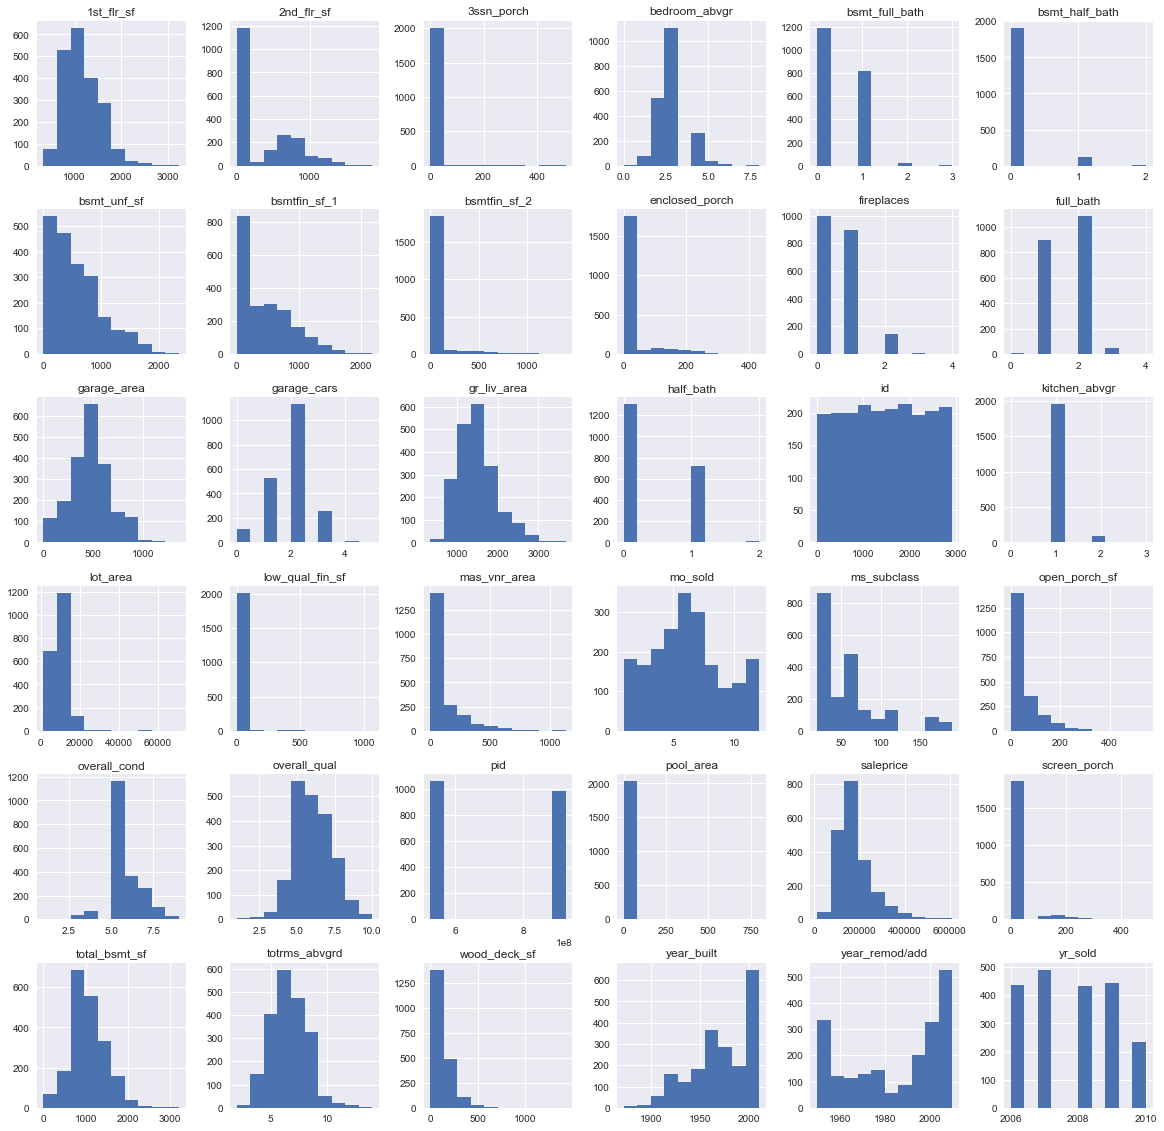

In [46]:
# Plot histograms for numerical columns
train.hist(figsize=(20, 20));

Most of the home sold were skewed to the right for size related features. This shows that big luxury home wasnt so common or affordable for the population living area the area. More research needs to be done to confirm this point.

Left skewed:
 - slight left skewed for overall quality
 - year built
 
Right skewed:
- sales price
- total basement sq ft
- total rooms above ground
- Garage area
- ground living area
- basement finished and unfinished sq ft
- first floor square ft

Overall quality of 6 is the most poular choice

In [47]:
# list with only numerical columns
col_numerical = [col for col in train.columns if train[col].dtype != np.object]

# list with only categorical columns
col_categorical = [col for col in train.columns if col not in col_numerical]

In [48]:
# Plot boxplot for categorical columns
def subplot_boxp(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(20, nrows*5.5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.boxplot(x = dataframe[column], y = dataframe.saleprice, width = 0.3, ax = ax[i])
        ax[i].set_title(column)
        # Set titles, labels, etc here for each subplot

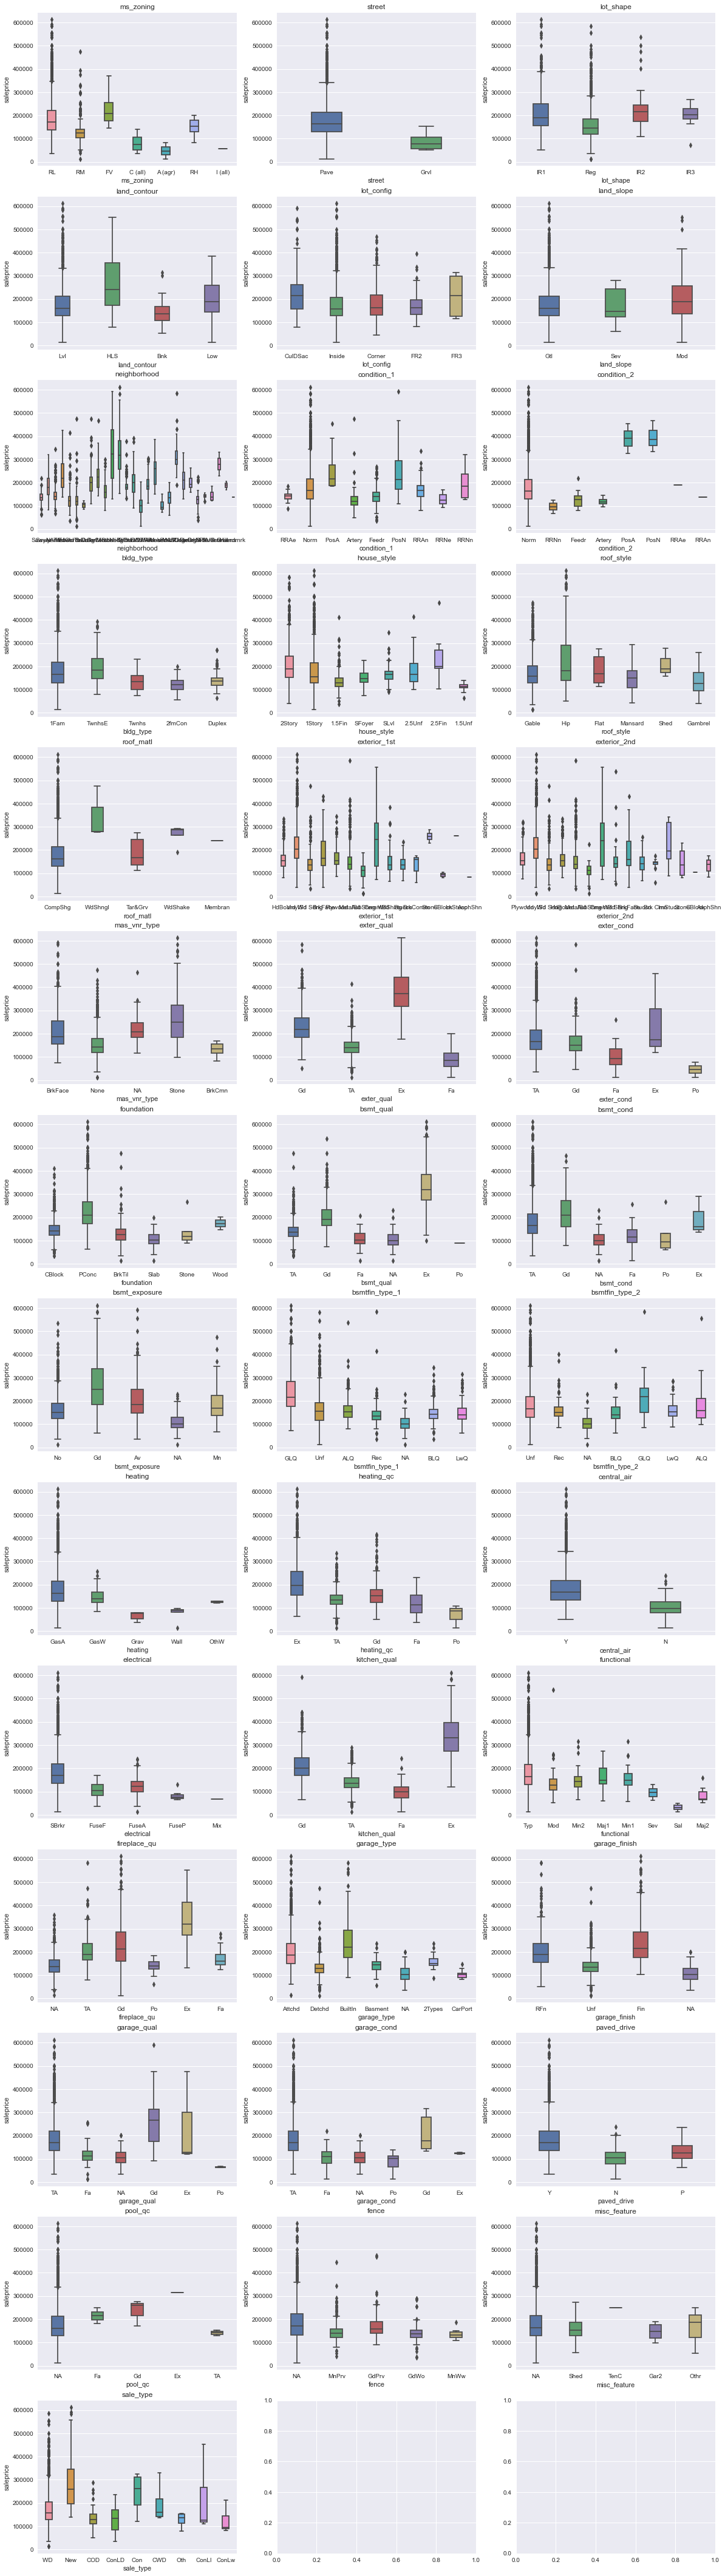

In [49]:
subplot_boxp(train, col_categorical);

From the boxplot, good to excellent quality is valued by home buyer as they are willing to pay more for better exterior, basement, fireplace, kitchen, roof, central air-conditioning, pavement and access to amenities.

Features were namely:

- Good to excellent garage quality
- Good garage condition
- Excellent fireplace quality
- Excellent kitchen quality
- With central air conditioning
- execellent basement quality
- Excellent exterior quality
- Roof material using WdShngi
- PosA and PosN of condition_2
- Neighbourhood

In [50]:
# plot the scatter plots again
def subplot_scatterp(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(20, nrows*5.5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.regplot(y=dataframe.saleprice, x=dataframe[column],ax=ax[i])
        ax[i].set_title(column,fontsize=14)
        # Set titles, labels, etc here for each subplot

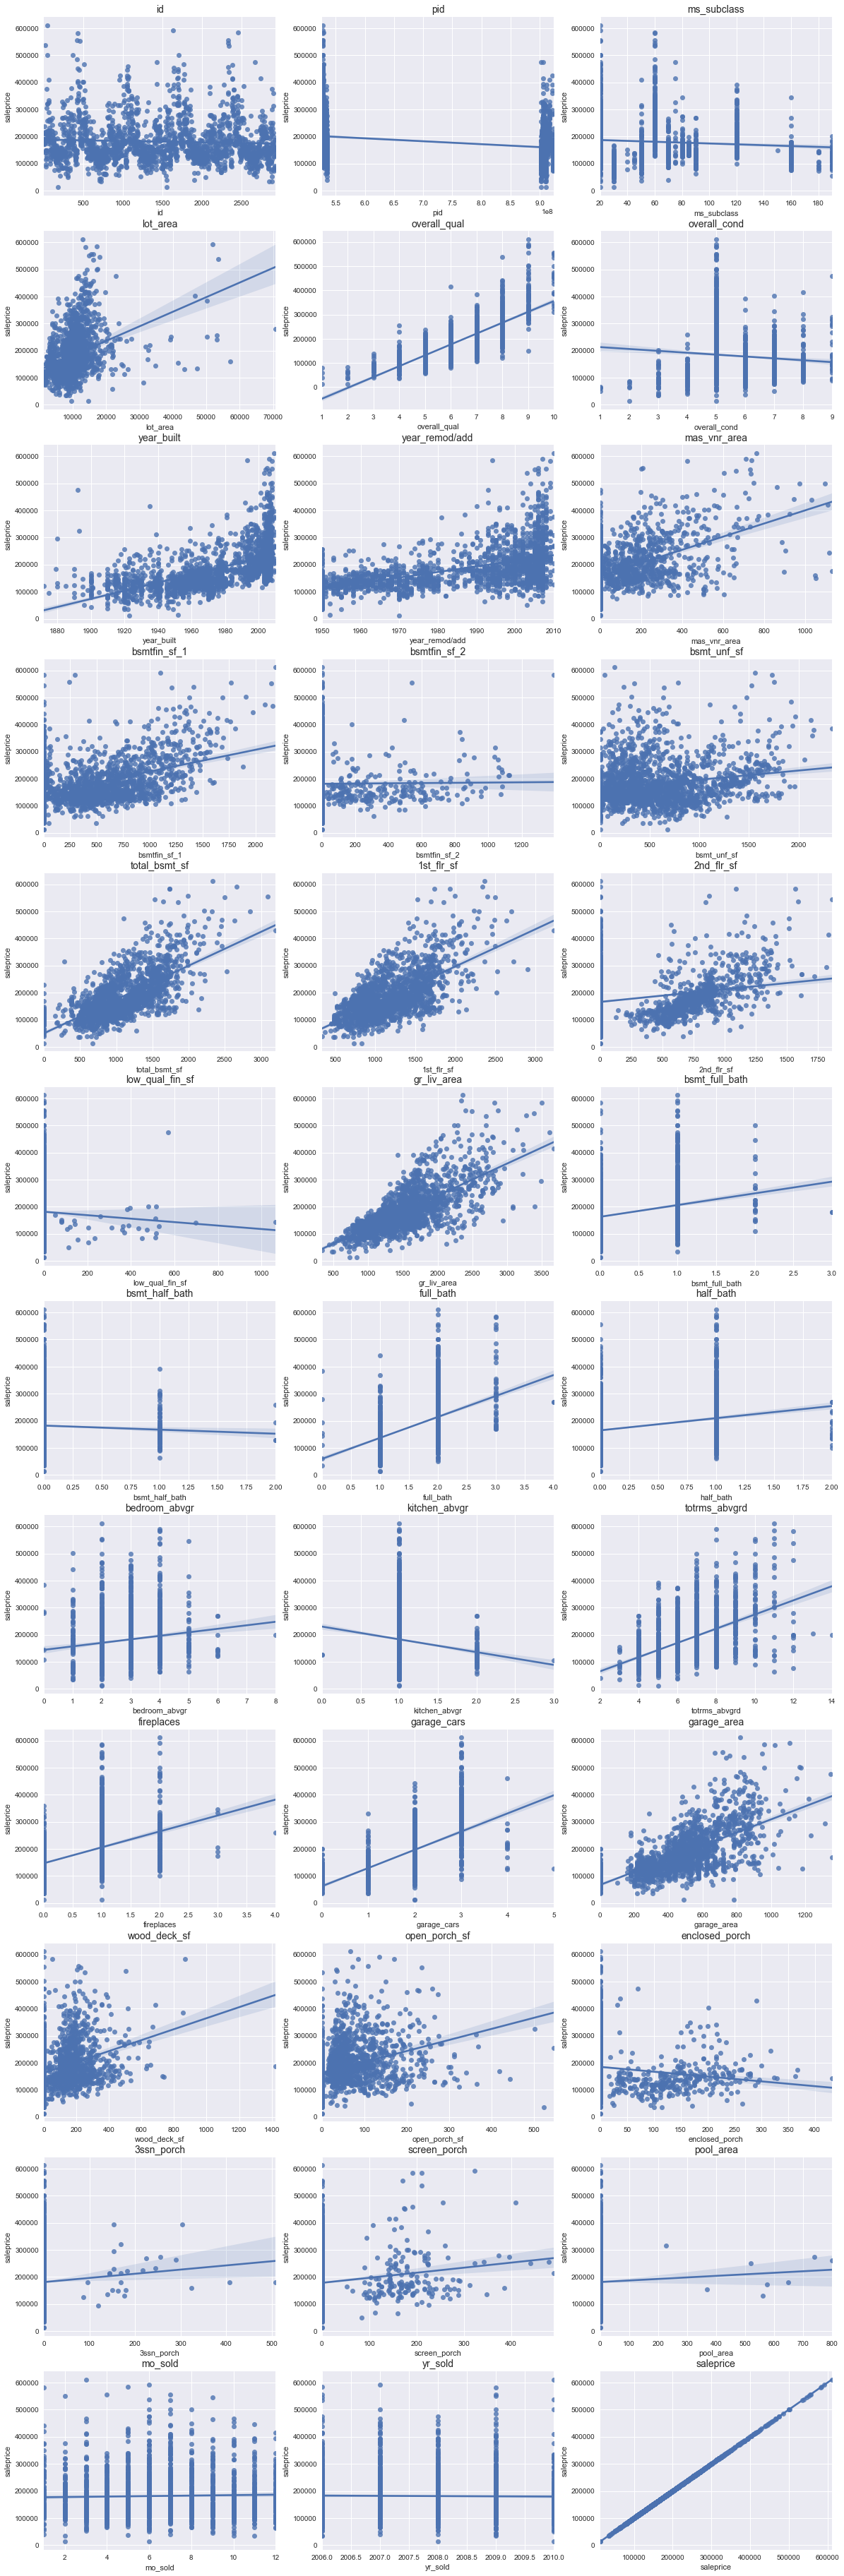

In [51]:
subplot_scatterp(train, col_numerical)

For scatter plot observations, linearity relationship observed between sales price and house size related features.
Discrete values features that have strong linear relationship with sales price:
1. Garage cars (size of garage in car capacity)
2. Total number of rooms above ground that does not include bathrooms
3. Number of full baths
4. Overall quality

Continueous values features that have strong linear relationship with sales price:
1. Total basement sq ft
2. First floor sq ft
3. Garage area
4. Above ground living area in sq ft

We can explore in depth on sales proce relaionship with size related features and quality features

**Summary of boxplots, scatterplots, histograms**
In general, it was observed that there is linear relationship between sales price and size of the home. However, based on the histograms, you can see the linearity increase of sales price with home size will be limited as the histograms were skewed mostly to the right. People are happy to purchase a home with a quality slightly above average at 6. Not so many big and expensive home sold. This could be due to availability of the homes built at the area or related to the income of the population. More reaseach needs to confirm this point. People are more willing to buy homes that are in excellent conditions and with good building materials. 

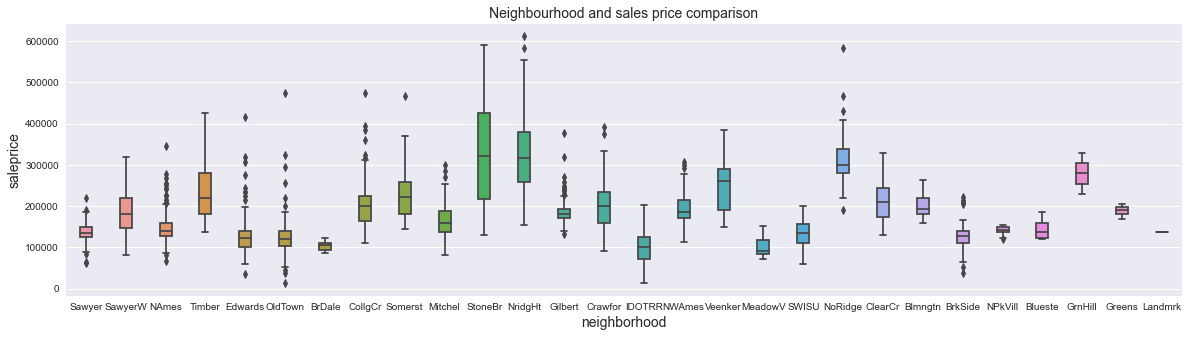

In [52]:
plt.figure(figsize=(20,5))
plt.xlabel("Neighbourhood", fontsize=14)
plt.ylabel("Sales price", fontsize=14)
plt.title("Neighbourhood and sales price comparison", fontsize=14)
sns.boxplot(x = train['neighborhood'], y = train.saleprice, width = 0.3);

More homes and higher sales price seems to be sold from StoneBr neighborhood. Most homes were sold from 100K to 200K

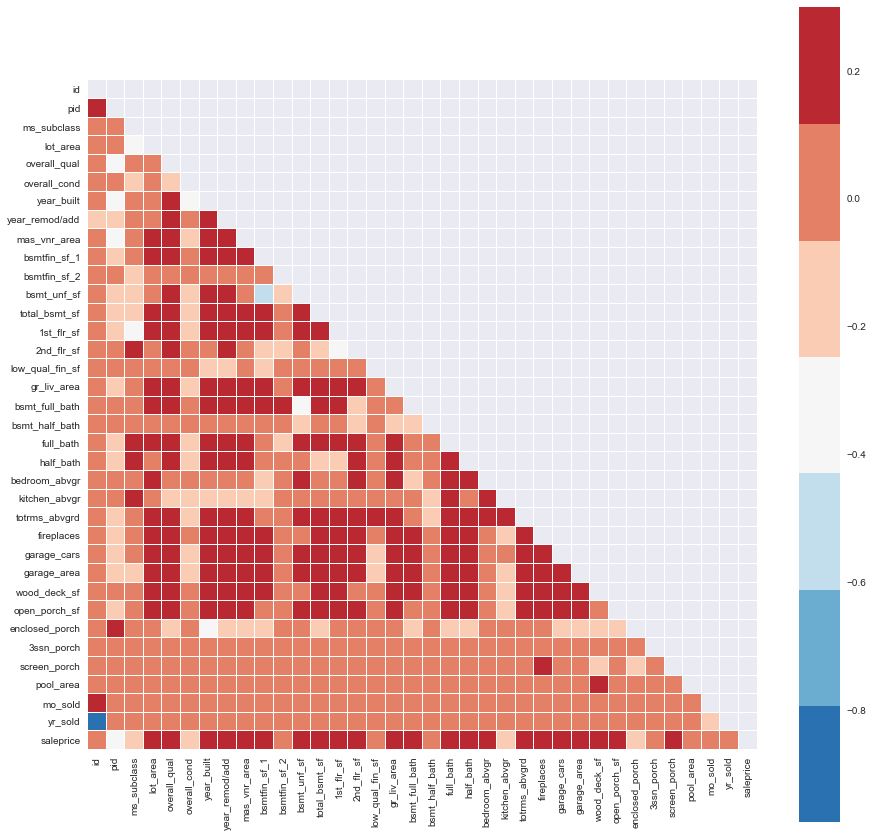

In [53]:
f, ax = plt.subplots(figsize=(15, 15))
mask = np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(), mask=mask, vmax=.3, linewidth=0.1, square=True, cmap=sns.color_palette("RdBu_r", 7));

In [54]:
# top 10 correlation features with sales price
train_co = train.corr().loc['saleprice'].sort_values(ascending = False).iloc[1:].head(10)
train_co = train_co.to_frame()
train_co.rename(columns={'saleprice':'Correlation to sales parice'}, inplace=True)
train_co

Correlation to sales parice
overall_qual                       0.804530
gr_liv_area                        0.720436
total_bsmt_sf                      0.668129
garage_area                        0.655160
1st_flr_sf                         0.650807
garage_cars                        0.648697
year_built                         0.573135
year_remod/add                     0.549715
full_bath                          0.536585
mas_vnr_area                       0.517518

In [55]:
train_pair = train.loc[:, ['overall_qual', 'gr_liv_area', 'total_bsmt_sf', 'garage_area', \
                           '1st_flr_sf','garage_cars', 'year_built', 'year_remod/add', \
                           'full_bath', 'saleprice']]

Wall time: 11.5 s


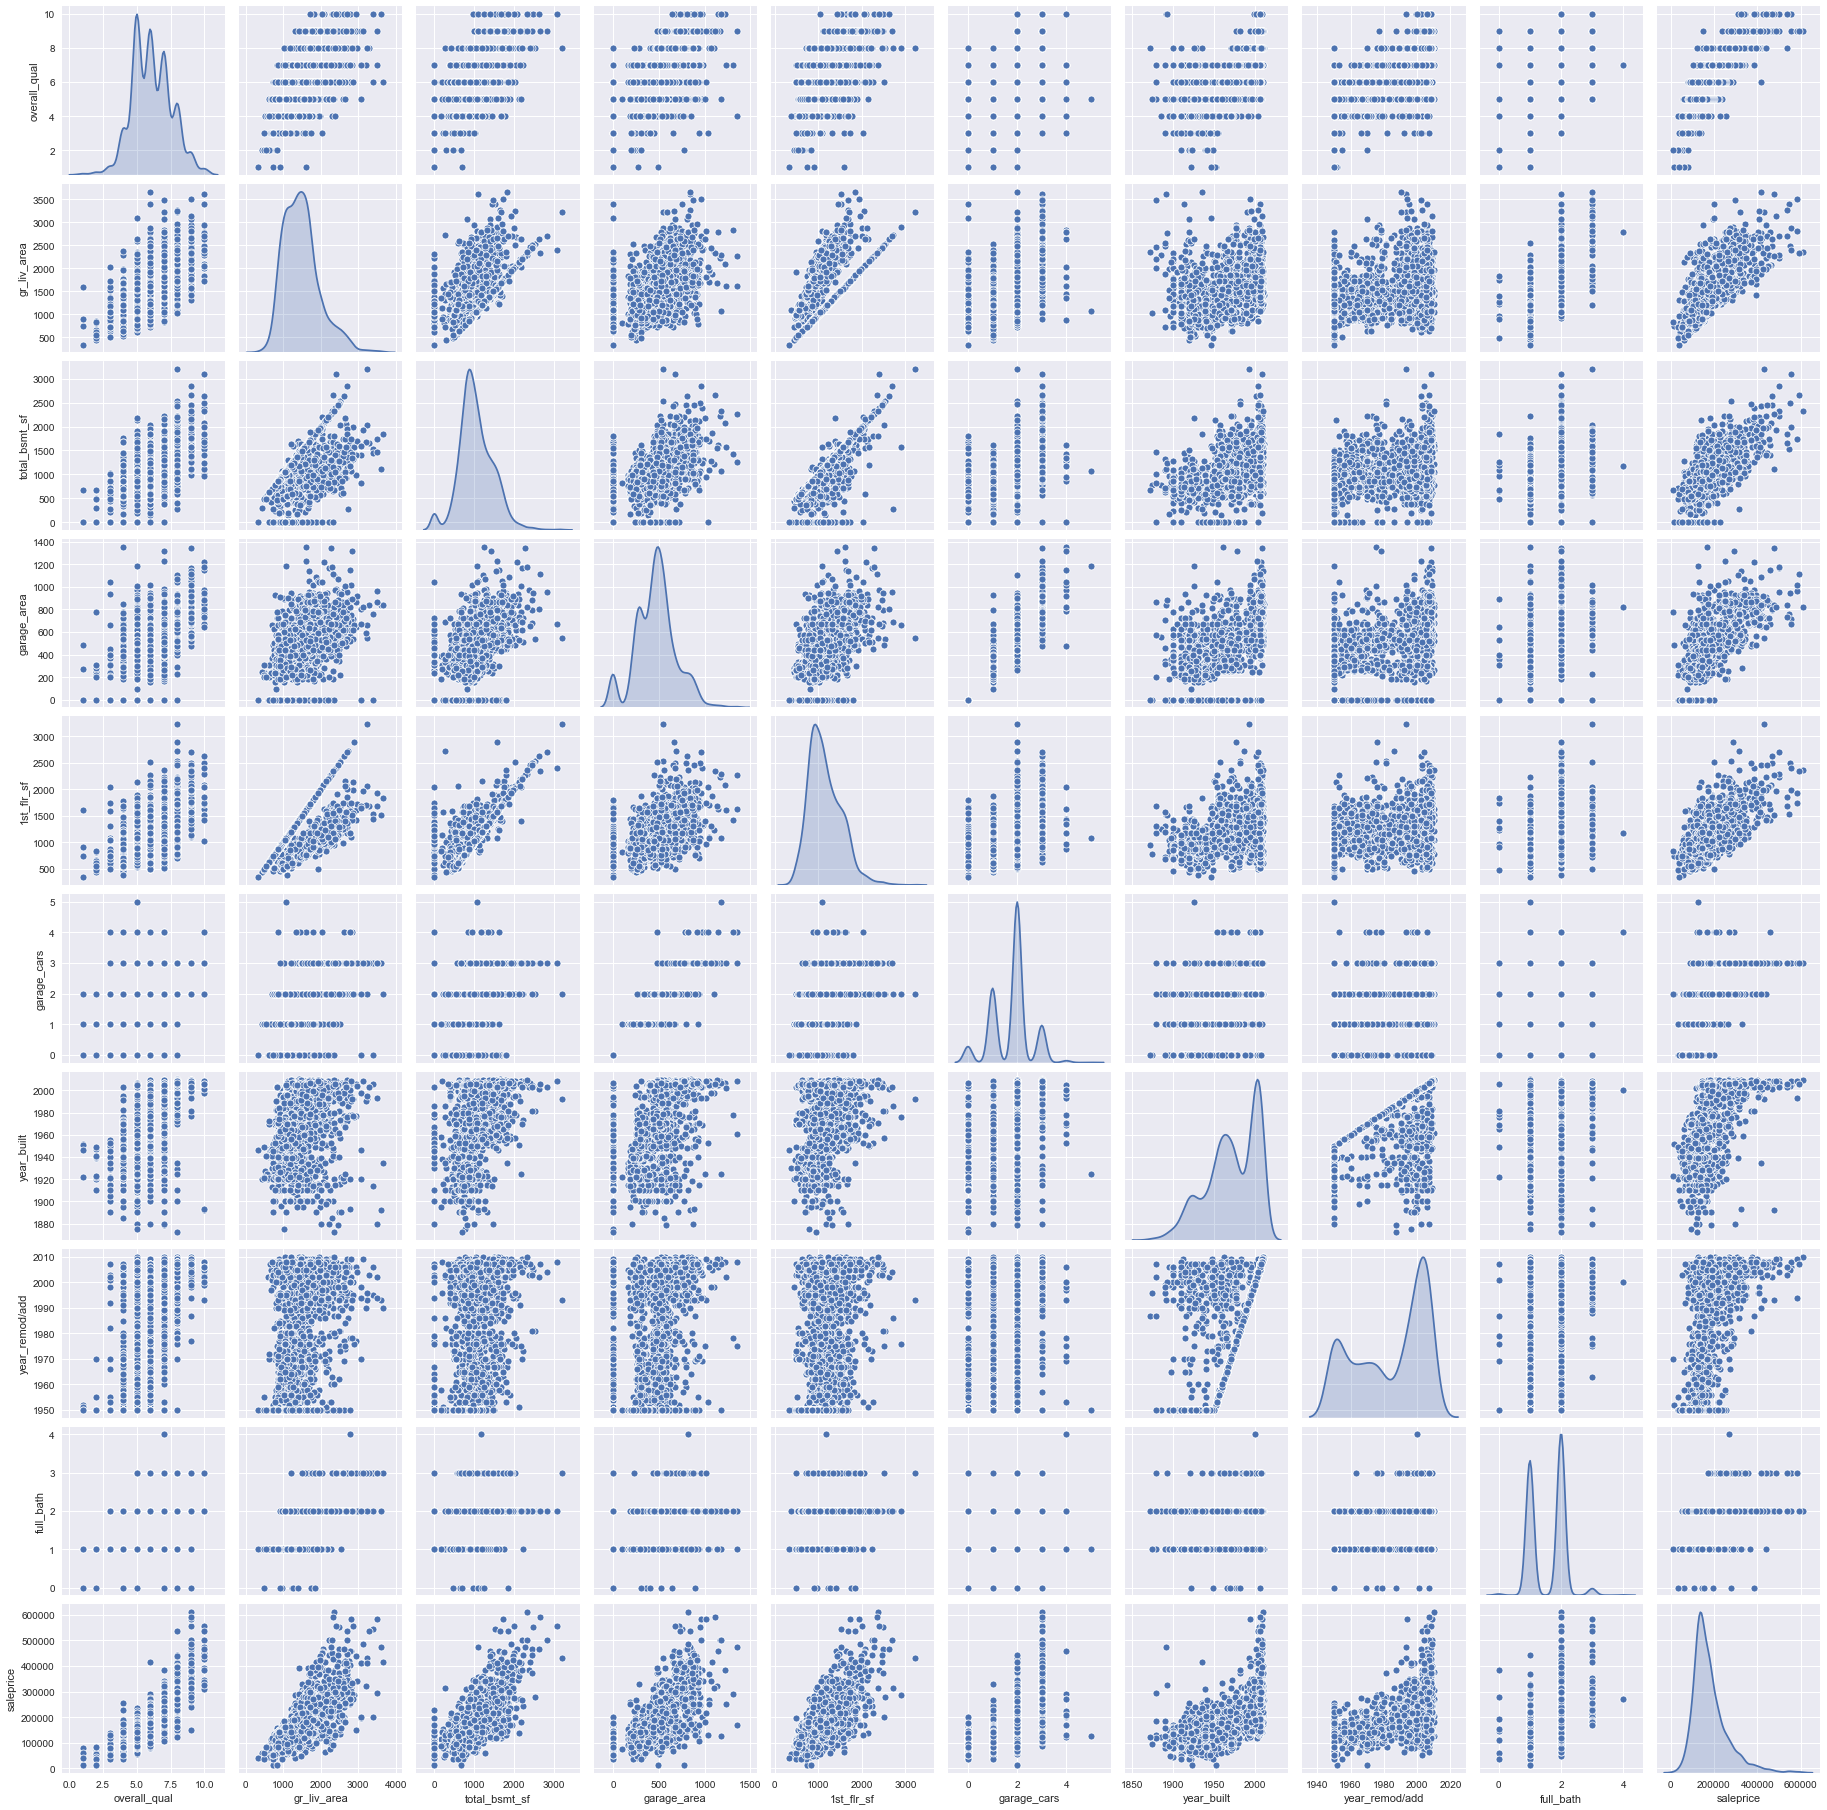

In [56]:
%%time
sns.pairplot(train_pair,kind ='scatter',diag_kind='kde')

**Convert ordinal columns to numeric**

In [57]:
# columns with str names for training set
train.select_dtypes(include = [object]).columns

Index(['ms_zoning', 'street', 'lot_shape', 'land_contour', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'exter_cond',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object')

In [58]:
# Apply numbers to ordinal categories by using a dictionary to a copy training set, for analysis
train_ordinal_analysis = train.loc[: ,['lot_shape', 'bsmt_exposure', 'exter_qual', 'bsmt_qual', 'heating_qc', 'kitchen_qual','fireplace_qu','saleprice']]

In [59]:
# Apply numbers to ordinal categories
lotshape_dict = {'Reg': 0, 'IR1': 1, 'IR2': 2,'IR3': 3}
bsmtex_dict = {'NA': 0,'No': 1,'Mn': 2,'Av': 3,'Gd': 4}
qual_dict = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'None': 0}

train_ordinal_analysis['lot_shape'] = train_ordinal_analysis['lot_shape'].map(lotshape_dict)
train_ordinal_analysis['bsmt_exposure'] = train_ordinal_analysis['bsmt_exposure'].map(bsmtex_dict)
train_ordinal_analysis['exter_qual'] = train_ordinal_analysis['exter_qual'].map(qual_dict)
train_ordinal_analysis['bsmt_qual'] = train_ordinal_analysis['bsmt_qual'].map(qual_dict)
train_ordinal_analysis['heating_qc'] = train_ordinal_analysis['heating_qc'].map(qual_dict)    
train_ordinal_analysis['kitchen_qual'] = train_ordinal_analysis['kitchen_qual'].map(qual_dict)  
train_ordinal_analysis['fireplace_qu'] = train_ordinal_analysis['fireplace_qu'].map(qual_dict)

In [ ]:
# The same for test

In [60]:
# plot the scatter plots again
def subplot_scatterp(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(20, nrows*5.5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.regplot(y=dataframe.saleprice, x=dataframe[column],ax=ax[i])
        ax[i].set_title(column,fontsize=14)
        # Set titles, labels, etc here for each subplot

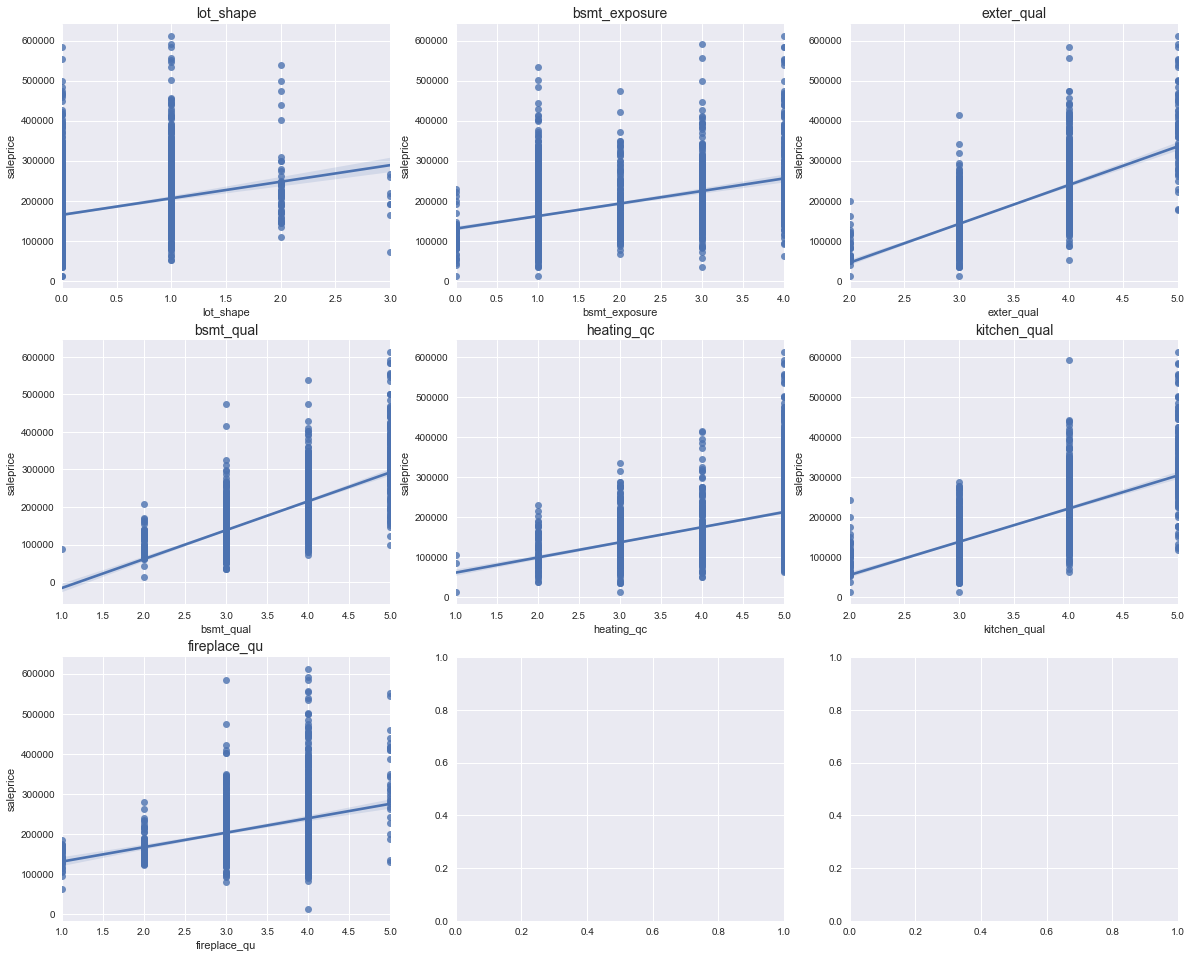

In [61]:
subplot_scatterp(train_ordinal_analysis, ['lot_shape', 'bsmt_exposure', 'exter_qual', 'bsmt_qual', 'heating_qc', 'kitchen_qual', 'fireplace_qu'])

Strong correlation observed for exterior quality, kitchen quality, basement quality

## Preprocessing and Feature engineering

**Investigate/manufacture features with linear relationships to the target**

In [62]:
# Take note of features that are directly collinear with each other
# garage_cars and garage_area. The bigger the garage area, the higher number of cars that is able to fit in
# 1st_flr_sf and gr_liv_area. The ground floor area and 1st floor sq ft is usually the same

In [63]:
# From the plots above you can further combine the features.
# 1. You can include Age of the house into your dataset by subtracting the year sold - year built
train['age'] = train['yr_sold'] - train['year_built']
test['age'] = test['yr_sold'] - test['year_built']

# 2. Do the same for remodeled age
train['remodeled_age'] = train['year_remod/add'] - train['year_built']
test['remodeled_age'] = test['year_remod/add'] - test['year_built']

# drop year_built
train.drop(['year_built', 'year_remod/add'], axis=1, inplace=True)
test.drop(['year_built', 'year_remod/add'], axis=1, inplace=True)

In [64]:
# 3. House total living area
train['total_liv_area'] = train['gr_liv_area'] + train['total_bsmt_sf']
test['total_liv_area'] = test['gr_liv_area'] + test['total_bsmt_sf']

In [65]:
# 4. Total baths
train['total_bath'] = train['full_bath'] + (train['half_bath'] * .5) + train['bsmt_full_bath'] + (train['bsmt_half_bath'] * .5)
test['total_bath'] = test['full_bath'] + (test['half_bath'] * .5) + test['bsmt_full_bath'] + (test['bsmt_half_bath'] * .5)

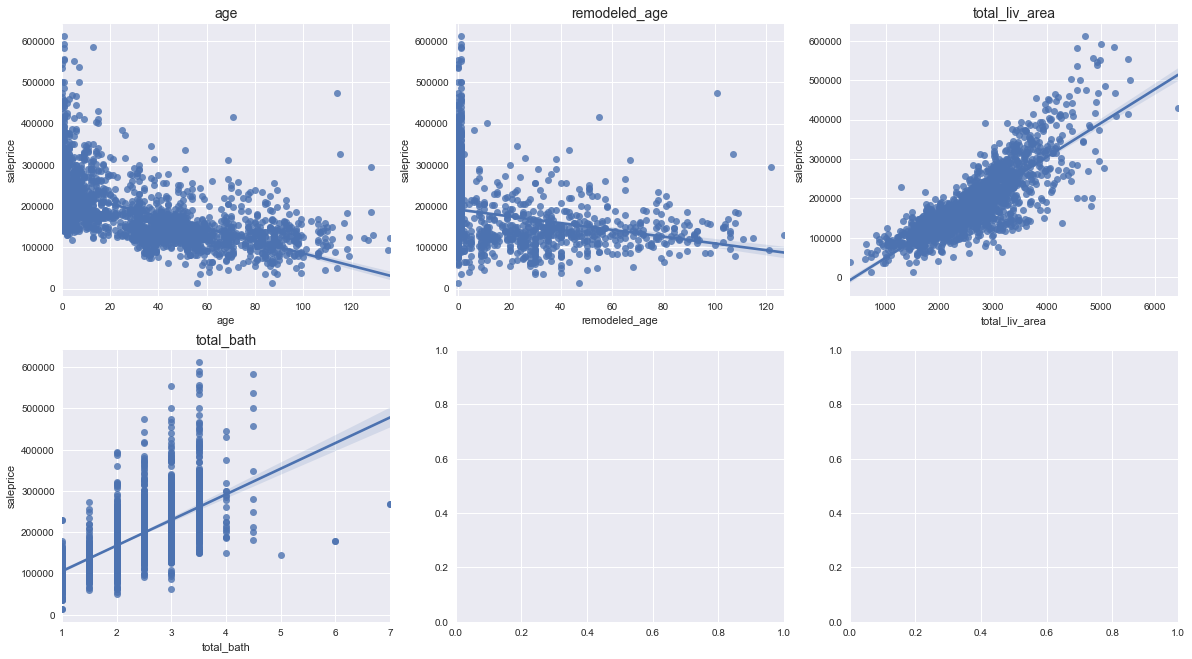

In [66]:
subplot_scatterp(train, ['age', 'remodeled_age', 'total_liv_area', 'total_bath'])

**Convert numeric columns to str**

In [67]:
# # Convert the numerical values that suppose to be str
# # They does not make sense in numbers
# retyped_columns = ['pid', 'ms_subclass', 'ms_zoning', 'mo_sold', 'yr_sold']
# train[retyped_columns] = train[retyped_columns].astype(str)
# test[retyped_columns] = test[retyped_columns].astype(str)
# # i left 'id' out for str conversion because i need it later as feature engineering function will reshuffle the index.
# # Need to keep 'id' in numeric for merging of dataframe

In [68]:
# # output cleaned data to csv
# train.to_csv('../data/train_preprocessed.csv')
# test.to_csv('../data/test_preprocessed.csv')

**Obtain a baseline score before feature engineering**

In [69]:
# # define X and y
# # only numerical columns can undergo the model fit

# feature_baseline = train.select_dtypes(exclude = [object]).columns
# X = train[feature_baseline].drop(['saleprice'], axis=1)
# y = train['saleprice']

In [70]:
# # create a model
# lr = LinearRegression()

In [71]:
# # define X and y train and test set

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=3050)

# model = lr.fit(X_train,y_train)

# scores = cross_val_score(model,X_train,y_train,cv=5)    
# print('cvs:', scores)

# print("Crossfold R2 mean: ", np.mean(scores))
# print("Crossfold R2 std: ", np.std(scores))

# # check the fit on test score
# print('Validation accuracy: ', model.score(X_test, y_test))

**Convert categorical variables to one-hot encoded**

In [72]:
# # create categorical features group for features found previously that has high correlation with salesprice
# features_categorical = ['condition_2', 'kitchen_qual', 'exter_qual', 'pool_qc', 'garage_type', 'garage_qual', 'bsmtfin_type_1', 'fireplace_qu', 'bsmt_qual', 'roof_matl']

In [73]:
# dummy_cat_train = pd.get_dummies(train[features_categorical], prefix=features_categorical, drop_first = True)
# dummy_cat_train.head()

In [74]:
# # do the same for test
# dummy_cat_test = pd.get_dummies(test[features_categorical], prefix=features_categorical, drop_first = True)
# dummy_cat_test.head()

In [75]:
# # select numerical columns in train file
# feature_num = train.select_dtypes(exclude = [object]).columns
# train_num = train[feature_num]

In [76]:
# # remove sales price column for feature engineering
# train_num = train[feature_num].drop(['saleprice'], axis=1)

In [77]:
# # select numerical columns in test file
# feature_num_test = test.select_dtypes(exclude = [object]).columns
# test_num = test[feature_num_test]

In [78]:
# # append the numerical features with categorical dummies. To form a list for feature engineering. For training dataframe
# train_feature = pd.concat([train_num, dummy_cat_train], axis=1)

In [79]:
# # append the numerical features with categorical dummies. To form a list for feature engineering. For test dataframe
# test_feature = pd.concat([test_num, dummy_cat_test], axis=1)

In [80]:
# # This file will be use for feature engineering
# train_feature.shape

In [81]:
# # This file will be use for testing later. The features is tally with training set
# test_feature.shape

In [82]:
# #Apply functions for generating each interactions in the train_feature dataframe
# from itertools import combinations
# from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# def add_interactions(df):
#     # Get features names
#     combos = list(combinations(list(df.columns),2))
#     colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
#     # Find interactions
#     poly = PolynomialFeatures(interaction_only=True, include_bias=False)
#     df = poly.fit_transform(df)
#     df = pd.DataFrame(df)
#     df.columns = colnames
    
#     # Remove interactions terms with all 0 values
#     noint_indicies = [i for i, x in enumerate(list((df ==0).all())) if x]
#     df = df.drop(df.columns[noint_indicies], axis=1)
    
#     return df

In [83]:
interactions_raw = add_interactions(train_feature)
interactions_raw

NameError: name 'add_interactions' is not defined

In [ ]:
# merge with sales price based on id as using function for interaction calculations will reshuffle the index
# merge with salesprice is to workout correlation
interactions = pd.merge(interactions_raw, train[['id', 'saleprice']])
interactions

In [ ]:
%%time
# due to huge amount of columns, I am generating a top 20 correlation list instead for correlation to replace heatmap
feature_engineering_top_30_corr = interactions.corr().loc['saleprice'].sort_values(ascending = False).iloc[1:].head(30)
feature_engineering_top_30_corr = feature_engineering_top_30_corr.to_frame()
feature_engineering_top_30_corr.rename(columns={'saleprice':'Correlation to sales parice'}, inplace=True)

In [ ]:
# diaplay top 20 co-relation to sales price
feature_engineering_top_30_corr
# correlation increases from 0.2 during EDA to 0.8~0.9 range

In [ ]:
%%time
# due to huge amount of columns, I am generating a bottom 5 correlation list instead for correlation to replace heatmap
# this bottom 5 is to see the most inversely correlated list. I am expecting 'age' to have inverse correlation
feature_engineering_bottom_5_corr = interactions.corr().loc['saleprice'].sort_values(ascending = False).iloc[1:].tail(5)
feature_engineering_bottom_5_corr = feature_engineering_bottom_5_corr.to_frame()
feature_engineering_bottom_5_corr.rename(columns={'saleprice':'Correlation to sales parice'}, inplace=True)
feature_engineering_bottom_5_corr

For top 30 correlations with salesprice, generally big homes, good quality, without pool, with higher number of total baths, with bigger garage can fetch higher price.

Surprisingly exterior quality, kitchen quality, fireplace, porch did not make it to the top 20 features list.

For inverse correlations with salesprice, we see age, meaning older homes were cheaper.  

## StandardScaler

In [ ]:
# define X and y
# only numerical columns can undergo the model fit
X = interactions.drop(['saleprice'], axis=1)
y = interactions['saleprice']

# Create X, y train and testing set
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# fit then transform to Scale the data for X 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train) # fit on X_train then apply the fit to test & train (transform)

# transform
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Linear Regression Model

In [ ]:
# create a model
lr = LinearRegression()

In [ ]:
# fit to model
model = lr.fit(X_train,y_train)

scores = cross_val_score(model,X_train,y_train,cv=5)    
print('cvs:', scores)

print("Crossfold R2 mean: ", np.mean(scores))
print("Crossfold R2 std: ", np.std(scores))

rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
print("Linear Regression RMSE is :", rmse.mean())
print("Linear Regression RMSE variance is: ", rmse.var())

In [ ]:
# check the fit on test score
print('Validation accuracy: ', model.score(X_test, y_test))

# predict on test data
y_pred = model.predict(X_test)
# evaluate model performance
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print('Linear Regression test RMSE: ', rmse_test)

It doesnt perform well. The standard deviation is huge and R2 mean is a large negative value. This shows the complexity is high after adding the interaction features. Regularization needs to be done to reduce the value.

## Ridge Model

In [ ]:
# example np.logspace(-3, 5, 10) means, you will try 10 alphas from 10**-3 up to 10**5.
ridge = RidgeCV(alphas=(np.logspace(-5, 5, 100)))
ridge.fit(X_train, y_train)
print(ridge.alpha_)
# Best alpha value is:

In [ ]:
# training data metrics
print("Ridge R2 mean is :", np.mean(cross_val_score(ridge, X_train, y_train, cv=5)))
print("Ridge R2 std is :", np.std(cross_val_score(ridge, X_train, y_train, cv=5)))
rmse = np.sqrt(-cross_val_score(ridge, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
print("Ridge RMSE is :", rmse.mean())
print("Ridge RMSE variance is: ", rmse.var())

In [ ]:
# apply the fit to test set to check for validity
print('Validation accuracy: ', ridge.score(X_test, y_test))
# Validity score of test set is very similar to the training set

In [ ]:
# predict on test data
y_pred = ridge.predict(X_test)
# evaluate model performance
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print('Ridge test RMSE: ', rmse_test)

## Lasso

In [ ]:
# lasso = LassoCV()
# lasso.fit(X_train, y_train)
# print(lasso.alpha_)
# # Best alpha value is:

In [ ]:
# print("Lasso R2 mean is: ", np.mean(cross_val_score(lasso, X_train, y_train, cv=5)))
# print("Lasso std dev is: ", np.std(cross_val_score(lasso, X_train, y_train, cv=5)))

# rmse = np.sqrt(-cross_val_score(lasso, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
# print("Lasso RMSE is :", rmse.mean())
# print("Lasso RMSE variance is: ", rmse.var())

In [ ]:
# # apply the fit to test set to check for validity
# print('Validation accuracy: ', lasso.score(X_test, y_test))

# # predict on test data
# y_pred = lasso.predict(X_test)
# # evaluate model performance
# rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
# print('Lasso test RMSE: ', rmse_test)

**Look at the lasso coefficent to see which features are the best**

In [ ]:
# # Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.
# sorted(abs(lasso.coef_), reverse=True)

In [ ]:
# # What percent of the variables in the original data set are "zeroed-out" by the lasso?
# total_len_coef = len(lasso.coef_)
# non_0_coef = np.count_nonzero(lasso.coef_)
# percentage_0 = (total_len_coef-non_0_coef)*100/total_len_coef
# print(percentage_0,"%")

In [ ]:
# # What are the most important predictors for how many housing prices?
# # create DataFrame for the feature names
# df = pd.DataFrame(list(interactions.columns))
# df.head()

In [ ]:
# # name the column for features
# df.rename(columns={0:'features'}, inplace=True)
# df.head()

In [ ]:
# # create a lasso.coef_ column
# df = pd.merge(df, pd.DataFrame(abs(lasso.coef_)), left_index=True, right_index=True)
# df.head()

In [ ]:
# # name a lasso.coef_ column
# df.rename(columns={0:'coefficient'}, inplace=True)
# df.head()

In [ ]:
# # print out the most important predictors
# df.sort_values('coefficient', ascending = False).head(20)

## Elastic net Model

In [ ]:
# %%time
# # fit elasticCV model
# n = np.linspace(0.01, 1, 20)

# elasticCV = ElasticNetCV(l1_ratio=n, cv=5)
# elasticCV.fit(X_train, y_train)

In [ ]:
# # Here is the optimal value of alpha
# enet_optimal_alpha = elasticCV.alpha_
# enet_optimal_alpha

In [ ]:
# print('Elastic Net R2 mean: ', np.mean(cross_val_score(elasticCV, X_train, y_train, cv=5)))
# print('Elastic Net R2 std: ', np.std(cross_val_score(elasticCV, X_train, y_train, cv=5)))

In [ ]:
# rmse = np.sqrt(-cross_val_score(elasticCV, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
# print("Elastic Net RMSE is :", rmse.mean())
# print("Elastic Net RMSE variance is: ", rmse.var())

In [ ]:
# # apply the fit to test set to check for validity
# print('Validation accuracy: ', elasticCV.score(X_test, y_test))
# # Validity score of test set is very similar to the training set

# # predict on test data
# y_pred = elasticCV.predict(X_test)
# # evaluate model performance
# rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
# print('Elastic Net test RMSE: ', rmse_test)

In [ ]:
# print("The value of elasticCV l1_ratio is:", elasticCV.l1_ratio_)

# Cross validation comparison

Four different models were tested using cross validation on training data:

Baseline score using linear regression before feature engineering as follows.\
Crossfold R2 mean:  0.8683736509854267\
Crossfold R2 std:  0.006022938908656508\
Validation accuracy:  0.8657622028126648\

Linear regression after feature engineering result in poor performance of R2 due to high complexity of the combined features introduced. Large RMSe observed showing poor fit with predicted values. Regularization is needed to suppress the high complexity.\
Crossfold R2 mean:  -7.969821369350244e+18\
Crossfold R2 std:  8.31199687302438e+18\
Linear Regression RMSE is : 173516818714486.3\
Linear Regression RMSE variance is:  1.9622320237016344e+28\
Validation accuracy:  -1.3581667962446723e+19\
Linear Regression test RMSE:  299369040960859.6\

Ridge regression model shows great improvement as compared to linear regresssion before feature engineering and after feature engineering. Validation with test set also shows good result.\
Best alpha value is: 1204.5035402587837\
Ridge R2 mean is : 0.9158586043540771\
Ridge R2 std is : 0.020383700766715206\
Ridge RMSE is : 22522.379153106733\
Ridge RMSE variance is:  5498525.07648118\
Validation accuracy:  0.9121718210170402\
Ridge test RMSE:  24073.945375516712\

Lasso regression model results:\
Best alpha value is: 629.2580829026599\
Lasso R2 mean is:  0.9146484642017543
Lasso std dev is:  0.026049687756173664
Lasso RMSE is : 22591.47931463516\
Lasso RMSE variance is:  9245207.372373212\
Validation accuracy:  0.917078943365566\
Lasso test RMSE:  23391.751703960686\

Elastic Net results is the same as Lasso and l1_ratio is 1 showing it is dominated by lasso.\
enet_optimal_alpha is 629.2580829026599\
lastic Net R2 mean:  0.9146484642017543\
Elastic Net R2 std:  0.026049687756173664\
Elastic Net RMSE is : 22591.47931463516\
Elastic Net RMSE variance is:  9245207.372373212\
Validation accuracy:  0.917078943365566\
Elastic Net test RMSE:  23391.751703960686\
The value of elasticCV l1_ratio is: 1.0\

## Kaggle Submission

In [ ]:
# # This is where I left off for the test file. After encoded
# test_feature.head()

In [ ]:
# # run through feature engineering for interactions, in the similar steps with training file
# test_interactions = add_interactions(test_feature)
# test_interactions

In [ ]:
# # There is 2625 columns in my training set
# X_train.shape

In [ ]:
# # test.csv has lesser columns than my training set. Hence i need to append 0s to fill up my test.csv columns
# # Get missing columns in the training test
# missing_cols = set(interactions_raw.columns ) - set(test_interactions.columns )
# # Add a missing column in test set with default value equal to 0
# for c in missing_cols:
#     test_interactions[c] = 0
# # Ensure the order of column in the test set is in the same order than in train set
# test_interactions = test_interactions[interactions_raw.columns]

In [ ]:
# # StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)
# test_interactions = scaler.transform(test_interactions)

In [ ]:
# # apply ridge prediction model
# y_pred = ridge.predict(test_interactions)
# y_pred

In [ ]:
# # check that there're 879 prediction rows
# export = pd.DataFrame({'Id': test_interactions.id, 'SalePrice': y_pred})
# print(export.shape)

In [ ]:
# # convert id to integer
# export['Id'] = export['Id'].astype(int)

In [ ]:
# # output cleaned predicted data to csv
# export.to_csv('../data/submissions_13092020.csv', index =False)

## Outside Research

## Conclusions and Recommendations